# Preparation des nos variables de sortie

Dans cette partie nous allons preparer notre ensemble de sortie en construisant nos varibles de sortie , celle ci seront 
constiruer à l'aide  des divers fonction qui nous aiderons à determiner pour une année si sur base des résultat que nous aons si un étudiant est passé en premiere seion, s'il a distingué ou bien s'il a échoue, nous determinerons enfin  le pourcentage obtebnu.

Notons que nous nous sommes butés à 2 grands problème concernant les données obtenus et qui risquent de biaiser nos calculs:
    - Nous n'avons pas pu obtenir le pourcentage final de certains étudiant ayant echouer ou abandonner leurs études avant la fin de l'année académique ces étudiants qui après la seconde session sont AA (Assimilé aux Ajournées ) n'ont pas de pourcentage final pour palier àce probleme nous avons remplacer cette valeur manquante par une valeur aleatoiree choisie entre 47 et 53 pourcent ce qui represente l'echec!
    - Pour nous étudiant le nombre des années académiques pour lequel nous avons le résultat n'est pas le meme  pour certains étudiant nous avons des informations pour 1 annéé académique, d'autres pour 2 , etc. Pour palier à ce problème nous avons utliser des ration pour nous valeur de sortie qui consiter à diviser le nombre sur le no,bre des année académique que l'étudiant a passée à la faculté


Comencons par charger nos libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for beatiful visualizations
%matplotlib inline 
import scipy.stats as scs #for statistics
import operator
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.formula.api import ols

Notons que dans cette partie nous allons Aussi faire une analyse statistique univarié et bi-varié entre nos données d"entree et celle de sortie

In [2]:
dataset=pd.read_csv("../dataset/DatasetOutV2.csv",index_col="Unnamed: 0")

In [3]:
dataset.rename(columns={'IDENTIFICATION':'ID'},inplace=True)

In [4]:
SuccefullMent=['S']
PartialSuccess=['ADM', 'ADTFC', 'ADSTM', 'ADSTFC', 'ADST']
Distinction=['D','GD']
FailSession=['AA','AR','nan']
FailureMention=['A','NAF','ANAF']

In [5]:
dataset.MENT1.value_counts()

AA        4569
A         2351
S         2037
D          268
ADM        101
ADTFC       81
ADSTM       74
ADSTFC      55
ADST        45
NAF         17
GD           7
ANAF         1
Name: MENT1, dtype: int64

In [6]:
dataset.columns

Index([u'ID', u'ACADYEAR', u'PERC1', u'MENT1', u'PERC2', u'MENT2', u'FAC',
       u'PROM', u'Echec', u'Pass1erSession', u'Distinction', u'PercFinal'],
      dtype='object')

Premierement Voici la fonction que nous avons utiliser pour determiner si un étudiant a reussi ou a echouer pour une année academique

In [7]:
def calculateSucess(x):
    """this function will check if a student pass of fail in an aacademic year"""
    if str(x['MENT2']) in FailSession+FailureMention and (str(x['MENT1']) not in SuccefullMent+PartialSuccess+Distinction):
        return pd.Series(True)
    else :
        return pd.Series(False)

In [8]:
Echec=dataset.apply(calculateSucess,axis=1)

In [9]:
Echec[:6]

,0
0,True
1,False
2,True
3,False
4,False
5,True


In [10]:
dataset[:6]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,43.000000
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,65.099998
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,41.000000


Avec cette unction nous avons pu determier si un étudiant a reussi ou echoué dans une année académique

In [11]:
dataset['Echec']=Echec

Ensuite On cherche à déterminer si l'étudiant est passé en premiere session dans une anné academique 

Voici la fonction qui nous permet d'effectuer ses calculs:

In [12]:
def calculatePass1estSes(x):
    """this function will check if a student pass in the 1st session in an academic year"""
    if x['MENT1'] in SuccefullMent+Distinction:
        return pd.Series(True)
    else :
        return pd.Series(False)

In [13]:
Pass1erSession=dataset.apply(calculatePass1estSes,axis=1)

In [14]:
dataset.loc[:,'Pass1erSession']=Pass1erSession
dataset['Pass1erSession']=Pass1erSession

In [15]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,43.000000
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,65.099998
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,41.000000
6,474,2014-2015,NaN,AA,NaN,NaN,FD,G3,True,False,False,46.000000
7,474,2015-2016,62.500000,S,NaN,NaN,FD,G3,False,True,False,62.500000


In [10]:
dataset.head(8).to_latex("../../FinalYearProjectReport/text/datasetOutV2.tex",bold_rows=True,decimal=',',encoding='utf-8',escape=True)

Ensuite on cherche à determiner si un étudiant a distinguer au cours d'une académique , voicila function:

In [16]:
def calculateDistinCtion(x):
    """this function will check if a student get a distinction mention in aacademic year"""
    if x['MENT1'] in Distinction or x['MENT2']in Distinction:
        return pd.Series(True)
    else :
        return pd.Series(False)

In [17]:
Distinction=dataset.apply(calculateDistinCtion,axis=1)

In [18]:
dataset.loc[:,'Distinction']=Distinction
dataset['Distinction']=Distinction

In [19]:
dataset.loc[dataset.Distinction].head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
47,2221,2012-2013,70.199997,D,NaN,NaN,FD,L2,False,True,True,70.199997
57,2457,2012-2013,76.400002,D,NaN,NaN,FSTA,TECH2,False,True,True,76.400002
96,3298,2015-2016,70.699997,D,NaN,NaN,FPSE,L2,False,True,True,70.699997
106,3578,2012-2013,70.099998,D,NaN,NaN,FD,L2,False,True,True,70.099998
110,3588,2013-2014,NaN,AA,73.500000,D,FSTA,Tech1,False,False,True,73.500000
114,3591,2013-2014,NaN,ADSTM,73.900002,D,FSTA,Tech2,False,False,True,73.900002
123,3626,2014-2015,71.900002,D,NaN,NaN,FSTA,Tech1,False,True,True,71.900002
140,3646,2013-2014,NaN,AA,73.300003,D,FSTA,Tech1,False,False,True,73.300003


Enfin Calculons le pourcentage final qu'a obtenu un étudiant au cours d'une anné academique 

In [20]:
def calculatePourcenatge(x):
    """this function will check if a student pass of fail in an aacademic year"""
    if x['Pass1erSession'] :
        return pd.Series(x['PERC1'])
    elif x['MENT2'] in SuccefullMent and  x['MENT1'] in FailSession+FailureMention+PartialSuccess:
        return pd.Series(x['PERC2'])
    elif str(x['MENT2']) in Distinction and  str(x['MENT1']) in FailSession+FailureMention+PartialSuccess :
        return pd.Series(x['PERC2'])
    else:
        return pd.Series(x['PERC2'])

In [21]:
def calculateDistinCtion2emeS(x):
    if str(x['MENT2']) in Distinction :
        return pd.Series(x['MENT2'])

In [22]:
PercFinal=dataset.apply(calculatePourcenatge,axis=1)

In [23]:
PercFinal.loc[dataset.Pass1erSession]

,0
4,65.099998
7,62.500000
8,65.000000
9,60.400002
10,68.000000
17,62.900002
18,68.800003
23,62.400002
28,66.500000
34,65.099998


In [24]:
dataset.loc[:,'PercFinal']=PercFinal
dataset['PercFinal']=PercFinal

il ya des étudiant qui on reussi mais qui n'ont  pas de pourcentage final

In [25]:
dataset.loc[operator.and_(np.isnan(PercFinal.get(0)) ,operator.or_(dataset.MENT2=='S',dataset.MENT1=='S'))]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
248,3978,2013-2014,NaN,AA,NaN,S,FSDC,L2,False,False,False,NaN
2176,7150,2012-2013,50.400002,A,NaN,S,FSEG,G2,False,False,False,NaN
2700,7530,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
2739,7569,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
2837,7630,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
3022,7750,2013-2014,NaN,ADSTFC,NaN,S,FD,G3,False,False,False,NaN
3100,7804,2013-2014,NaN,AA,NaN,S,FD,G3,False,False,False,NaN
3701,8300,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN
4089,8477,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN
6648,9688,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN


In [26]:
dataset.loc[operator.and_(np.isnan(PercFinal.get(0)) ,operator.or_(dataset.MENT2=='S',dataset.MENT1=='S')),'PercFinal']=55

In [27]:
dataset.loc[dataset.MENT2.isin(PartialSuccess),'PercFinal']=55

In [28]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,NaN
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,65.099998
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,NaN
6,474,2014-2015,NaN,AA,NaN,NaN,FD,G3,True,False,False,NaN
7,474,2015-2016,62.500000,S,NaN,NaN,FD,G3,False,True,False,62.500000


Nous allons remplacer les valeurs manquantes des pourcentage final par un nombre aleatoire symbolisant l'echec

In [29]:
dataset.loc[dataset.Distinction][['PERC1','PERC2','PercFinal','MENT1','MENT2']].MENT1.value_counts()

D         268
AA         74
ADSTM       7
GD          7
A           5
ADM         4
ADTFC       4
ADSTFC      2
ADST        1
Name: MENT1, dtype: int64

In [ ]:
Verifions encore

In [172]:
dataset.loc[np.isnan(dataset.PercFinal)]['MENT2'].value_counts()

AA        515
A         485
NAF        46
ADM        23
ADSTM      19
ADTFC       5
ADST        5
ANAF        3
AR          2
ADSTFC      2
Name: MENT2, dtype: int64

In [30]:
dataset.PercFinal=dataset.PercFinal.apply(lambda x: np.random.choice([x for x in np.arange(47.0, 50, 0.25)]) if (np.isnan(x)) else x)

In [31]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,47.000000
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,65.099998
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,49.000000
6,474,2014-2015,NaN,AA,NaN,NaN,FD,G3,True,False,False,48.250000
7,474,2015-2016,62.500000,S,NaN,NaN,FD,G3,False,True,False,62.500000


Nous venons de finir le calcul de nos metriques  d'evaluations groupons enfin les metriques pour l'étudiant m

In [32]:
 def f(x):
    A = list(x['Echec'])
    D = list(x['Distinction'])
    S1 = list(x['Pass1erSession'])
    Nbre = float(len(x['ACADYEAR']))
    return pd.Series(dict(
     EchecRatio = int(A.count(True))/Nbre,
     DistinctionRatio = int(D.count(True))/Nbre,
     Pass1stSessionRatio = int(S1.count(True))/Nbre,
     CGPA = np.mean(x['PercFinal']),
     NACADYEAR= int (Nbre)
    ))

In [33]:
datasetRatio=dataset.groupby('ID').apply(f).reset_index()

In [34]:
datasetRatio.head(8)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,47.000000,0.0,1.0,1.0,0.0
1,215,63.099998,0.0,0.0,1.0,0.0
2,343,52.200001,0.0,1.0,1.0,0.0
3,356,59.900002,0.0,0.0,1.0,0.0
4,398,65.099998,0.0,0.0,1.0,1.0
5,429,49.000000,0.0,1.0,1.0,0.0
6,474,55.375000,0.0,0.5,2.0,0.5
7,526,65.000000,0.0,0.0,1.0,1.0


In [13]:
datasetRatio.head(8).to_latex("../../FinalYearProjectReport/text/datasetRatio.tex",bold_rows=True,decimal=',',encoding='utf-8',escape=True)

In [212]:
datasetRatio.loc[operator.and_(datasetRatio.DistinctionRatio == 1 , datasetRatio.NACADYEAR==3)]

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
211,4091,72.199999,1.0,0.0,3.0,0.000000
671,5178,71.533333,1.0,0.0,3.0,0.666667
1095,6914,74.900002,1.0,0.0,3.0,1.000000
1928,8498,72.433334,1.0,0.0,3.0,1.000000
2364,9048,71.733332,1.0,0.0,3.0,0.333333
2393,9078,80.766665,1.0,0.0,3.0,1.000000
2830,9527,75.866666,1.0,0.0,3.0,1.000000


In [213]:
dataset.loc[dataset.ID==9078]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
5311,9078,2013-2014,80.199997,GD,NaN,NaN,FSTA,G0,False,True,True,80.199997
5312,9078,2014-2015,82.699997,GD,NaN,NaN,FSTA,G1,False,True,True,82.699997
5313,9078,2015-2016,79.400002,D,NaN,NaN,FSTA,G2,False,True,True,79.400002


Le modèle est parfait Nous pouvons maintenant passer à l'analyse des données de sortie Pour nous 2 ensembles d'apprentissage

In [35]:
dataset.to_csv('../dataset/DatasetOutV2.csv')
datasetRatio.to_csv('../dataset/DatasetOutRatioV1.csv')

In [52]:
datasetRatio=pd.read_csv('../dataset/DatasetOutRatioV1.csv',index_col='Unnamed: 0')

In [16]:
datasetRatio.head(8).to_latex("../../FinalYearProjectReport/text/DatasetRatio.tex",bold_rows=True,decimal=',',encoding='utf-8',escape=True)

In [37]:
datasetRatio.head(1)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,47.0,0.0,1.0,1.0,0.0


## Analyse des données en entré Vs Donnnées en Sortie 

Nous allons effectuer maintenat une analyse bi varié des données en entrée VS les donnes en sortie et expliquer nos données de sortie

Nous venons d'avoir notre ensemble d'apprentissage de sortie et disons que notre sortie comprend que notre ensemble comprend non pas un seul variable de sortie mais 4 variable de sortie qui sont :

- Le CGPA : La moyenne des points obtenus au cours d'une années académique
- DistinctionRatio : Le nombre de fois que l'etudiant a distinctigué divisé par le nombre des années academique
- EchecRatio : Le nombre de fois que l'etudiant a échoué divisé par le nombre des années academique
- PassAstSessionRatio : Le nombre de fois que l'etudiant est passée en prèmiere session divisé par le nombre des années academique


Nos 3 dernier ration sont des nombres variant qui peuvent prendre ses differents valeurs :
    - 0 :signifie que l'etudiant a un ration de 0
    - 1 :signifie ration: 1/1,2/2,3/3,4/4
    -0.25 : 1/4
    -0.3333: 1/3
    -0.5:2/4 ou 1/2
    -0.66666 :2/3
    -0.75:3/4
Nous allons apprenhender ce probleme en terme de classification donc nous allons affecter des lettre à ces ration:
    - 0: G
    - 1:A
    - 0.25 : F
    - 0.333:E
    - 0.5:D
    - 0.666:C
    - 0.75:B
qui correspond au classe respectif!

    

In [215]:
datasetRatio.columns

Index([u'ID', u'CGPA', u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [53]:
datasetRatio.loc[datasetRatio.EchecRatio==0.0,'EchecRatio']='G'
datasetRatio.loc[datasetRatio.EchecRatio==1.0,'EchecRatio']='A'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/4.0,'EchecRatio']='F'
datasetRatio.loc[datasetRatio.EchecRatio==0.333333333333,'EchecRatio']='E'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/4.0,'EchecRatio']='D'
datasetRatio.loc[datasetRatio.EchecRatio==0.666666666667,'EchecRatio']='C'
datasetRatio.loc[datasetRatio.EchecRatio==3.0/4,'EchecRatio']='B'

In [55]:
datasetRatio.loc[datasetRatio.DistinctionRatio==0.0,'DistinctionRatio']='G'
datasetRatio.loc[datasetRatio.DistinctionRatio==1.0,'DistinctionRatio']='A'
datasetRatio.loc[datasetRatio.DistinctionRatio==1.0/4.0,'DistinctionRatio']='F'
datasetRatio.loc[datasetRatio.DistinctionRatio==0.333333333333,'DistinctionRatio']='E'
datasetRatio.loc[datasetRatio.DistinctionRatio==2.0/4.0,'DistinctionRatio']='D'
datasetRatio.loc[datasetRatio.DistinctionRatio==0.666666666667,'DistinctionRatio']='C'
datasetRatio.loc[datasetRatio.DistinctionRatio==3.0/4,'DistinctionRatio']='B'

In [56]:
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.0,'Pass1stSessionRatio']='G'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==1.0,'Pass1stSessionRatio']='A'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==1.0/4.0,'Pass1stSessionRatio']='F'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.333333333333,'Pass1stSessionRatio']='E'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==2.0/4.0,'Pass1stSessionRatio']='D'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.666666666667,'Pass1stSessionRatio']='C'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==3.0/4,'Pass1stSessionRatio']='B'

In [57]:
datasetRatio.head(8)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,47.000000,G,A,1.0,G
1,215,63.099998,G,G,1.0,G
2,343,52.200001,G,A,1.0,G
3,356,59.900002,G,G,1.0,G
4,398,65.099998,G,G,1.0,A
5,429,49.000000,G,A,1.0,G
6,474,55.375000,G,D,2.0,D
7,526,65.000000,G,G,1.0,A


In [43]:
datasetRatio.loc[datasetRatio.EchecRatio==0.0,'EchecRatio']='G'
datasetRatio.loc[datasetRatio.EchecRatio==1.0,'EchecRatio']='A'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/4.0,'EchecRatio']='F'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/3.0,'EchecRatio']='E'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/4.0,'EchecRatio']='D'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/3.0,'EchecRatio']='C'
datasetRatio.loc[datasetRatio.EchecRatio==3.0/4,'EchecRatio']='B'

Combinons maitenant notre ensemble d'entre  avec notre ensemble de sortie

In [58]:
datasetRatio.groupby('EchecRatio')['CGPA'].mean()

EchecRatio
0.333333333333    55.975086
A                 48.619476
C                 52.282203
D                 54.119131
F                 59.185000
G                 61.005403
Name: CGPA, dtype: float64

In [59]:
datasetRatio.loc[datasetRatio.DistinctionRatio<=0.333333333333,'DistinctionRatio']='E'


In [60]:
datasetRatio.loc[datasetRatio.Pass1stSessionRatio<=0.333333333333,'Pass1stSessionRatio']='E'

In [61]:
datasetRatio.loc[datasetRatio.EchecRatio<=0.333333333333,'EchecRatio']='E'

In [62]:
datasetRatio.groupby('Pass1stSessionRatio')['CGPA'].mean()

Pass1stSessionRatio
A    64.332685
B    64.482927
C    62.656185
D    62.299784
E    60.852491
F    60.304167
G    55.469618
Name: CGPA, dtype: float64

In [63]:
datasetRatio.groupby('EchecRatio')['CGPA'].mean()

EchecRatio
A    48.619476
C    52.282203
D    54.119131
E    55.975086
F    59.185000
G    61.005403
Name: CGPA, dtype: float64

Nous venos de voir la repartion des moyenne des GPA dans les les categoriesn de nos differentes valeurs des differentes mentions

Passons maitenant a l'analyse des nos valeurs d'entrée face au GPA

In [64]:
datasetIn=pd.read_csv('../dataset/DatasetInClean.csv',index_col='Unnamed: 0')

In [65]:
datasetIn.head(8)

,IDENTIFICATION,SCHOOLSTATUS,SCHOOL_RIGHT,OPTION_RIGHT,FAC,SCHOOLPROVINCE,BIRTHDAY,GENDER,DIPLOMPERCENTAGE,AGE
0,3895,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1985-07-16,H,52.0,31
1,4048,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1987-04-20,H,53.0,30
2,4217,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1989-01-22,H,54.0,28
3,4347,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1987-07-11,H,53.0,29
4,4409,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1989-11-19,H,58.0,27
5,4473,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1986-03-18,H,52.0,31
6,4627,protestant,zanner,latin philo,FD,NORD-KIVU,1988-03-16,F,52.0,29
7,4649,protestant,zanner,latin philo,FD,NORD-KIVU,1990-10-08,F,53.0,26


In [66]:
 
reload(sys)
sys.setdefaultencoding('utf-8')

In [67]:
datasetIn.rename(columns={'IDENTIFICATION':'ID'},inplace=True)

In [68]:
datasetIn.drop(labels=['BIRTHDAY'],axis=1,inplace=True)

In [69]:
datasetIn.rename(columns={'DIPLOMPERCENTAGE':'DIPPERC'},inplace=True)

In [70]:
datasetFin=pd.merge(datasetIn,datasetRatio,on='ID')

In [71]:
datasetFin.to_csv('../dataset/DatasetFinalV1.csv')

In [72]:
datasetFin.describe()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,8720.744221,56.878914,24.732768,57.962200,1.913892
std,2451.528838,5.756663,4.621602,6.216100,0.905487
min,45.000000,50.000000,18.000000,35.700001,1.000000
25%,7149.000000,52.000000,22.000000,54.000000,1.000000
50%,9172.000000,56.000000,24.000000,58.599998,2.000000
75%,10579.500000,60.000000,27.000000,62.099998,3.000000
max,12360.000000,86.000000,59.000000,83.549999,4.000000


Analyse dansla partie precdeante nous allons faire l'analyse Bi-varié à 8 niveau:
1. CGPA-Diplome Province : Pour voir la relation entre le CGPA et la province d'origine de l'etudiant
2. CGPA-DIPPOURCENTAGE: Pour voir la relation entre le CGPA et la pourcentage obtenu à l'exetat
3. CGPA-AGE: Pour voir la relation entre l'age de l'etudiant et le CGPA
4. CGPA-FAC-DIPLOMEOPTION: Pour voir la relation entre le CGPA et l'option du diplome mais par rapport aux faculté choisie
5. CGPA-FAC-SEXE: Pour la relation avec le sexe des étudiants et le CGPA Optenu
6. CGPA-FAC-SCHOOL: pour la relation entre l'ecole de provenance  la fac 
7. GPA-FAC-SCOOLSTATUS : pour la relation entre le status de l'ecole de la FAC
8. FAC-CGPA

### CGPA-DIPLOME POURCENTAGE

Pour evaluer ce genre de relation nous allons utliser le coeficient de correlation de pearson:


In [73]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)


In [74]:
pearsonr(datasetFin.CGPA,datasetFin.DIPPERC)

(0.25247942659297834, 1.7826800403711611e-69)

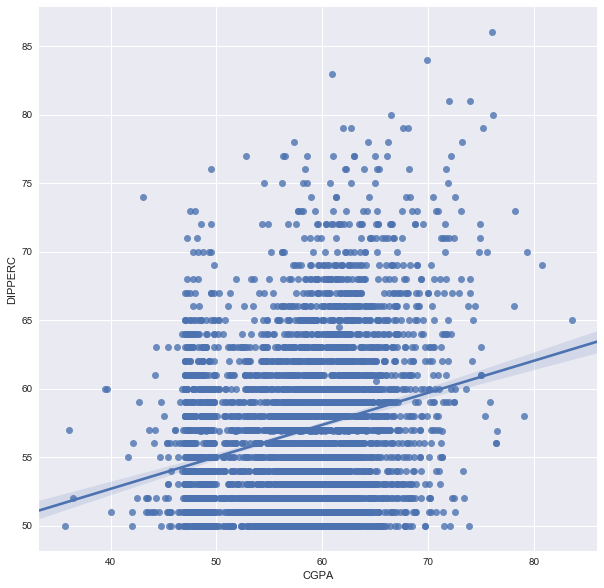

In [75]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x="CGPA", y="DIPPERC", data=datasetFin,fit_reg=True)

Dans une premiere approche on remarque qu'il n'existe pas de correlation dans entre le diplome obtenus à l'exetat et la moyenned u poucentage final à l'université

Regardons de plus pret au sein de chaque faculté s'il peut y avoir une correlation.

In [334]:
Medecine=datasetFin.loc[datasetFin.FAC=='FM']

#### Distribution DU GPA

Essayons de voir la distribution et la variation du CGPA Globalement avnt de l'analyser de plus pret au sein de chaque faculté

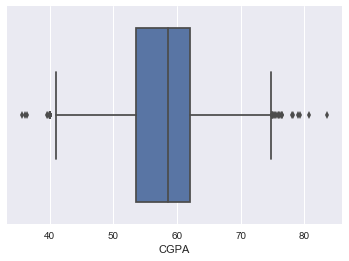

In [532]:
plt.figure()
ax = sns.boxplot(x=datasetFin['CGPA'])
plt.savefig('CGPA.png',dpi=100)

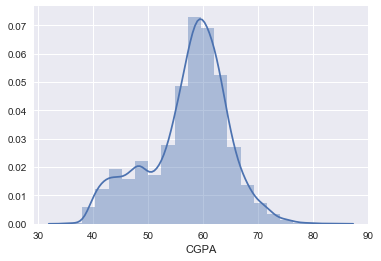

In [533]:
plt.figure()
sns.distplot(datasetFin['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADist.png',dpi=100)

Nous Pouvons aisement remarquer que notre variable suit une distribution presque normale si on prend compte uniqement des étudiant ayant un pourcentage superieru à 50

#### A. Faculté de Médecine

A.0 Distribution du CGPA

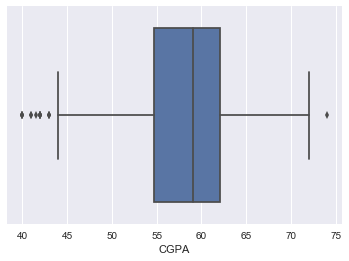

In [535]:
plt.figure()
ax = sns.boxplot(x=Medecine['CGPA'])
plt.savefig('CGPA.png',dpi=100)

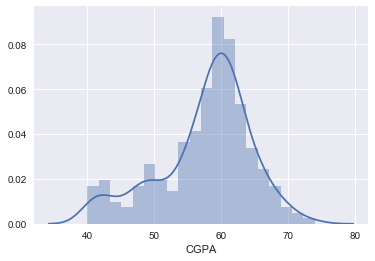

In [542]:
plt.figure()
sns.distplot(Medecine['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistMed.png',dpi=100)

On remarque que cette distribution est normale avec un écart type de : 7

In [543]:
np.std(Medecine.CGPA)

6.948726408145192

A.1 CGPA-POURCENTAGE

Cherchons les differentes correlations pouvan exsiter au sein de la faculté de medecine

In [448]:
CorreMatrix=Medecine.corr(method='pearson')

In [450]:
CorreMatrix.CGPA.sort_values(ascending=False)

CGPA         1.000000
DIPPERC      0.447654
NACADYEAR    0.158242
ID           0.096283
AGE         -0.256688
Name: CGPA, dtype: float64

In [337]:
pearsonr(Medecine.CGPA,Medecine.DIPPERC)

(0.44765396714867312, 2.5042090286791821e-13)

Au sein de la faculté de medécine nous remarquons que la correlation entre le pourcenatge à l'exetat et le CGPA est de 0.45  ce qui est pas mal

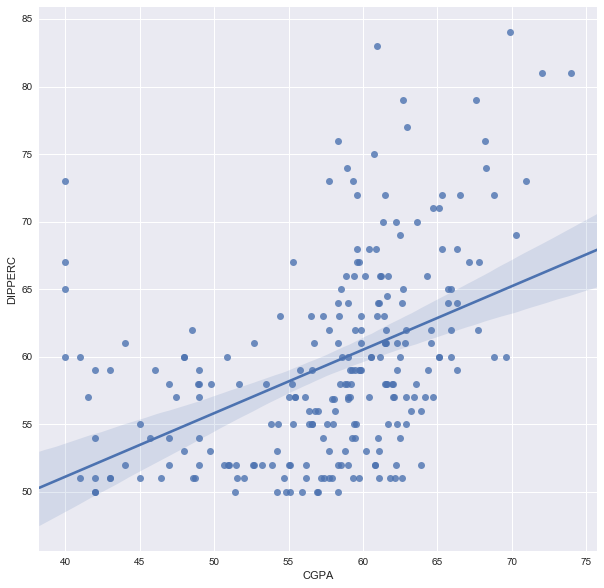

In [340]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x="CGPA", y="DIPPERC", data=Medecine,fit_reg=True)

A.2 Age et CPGA

In [341]:
pearsonr(Medecine.CGPA,Medecine.AGE)

(-0.2566879460545976, 5.3370210238152509e-05)

In [ ]:
aucune relation entre l'age  et le diplome pourcenatge 

A.2 SchoolProvinece

In [344]:
datasetFin.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [348]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)

In [349]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),5.0,1560.231935,312.046387,7.273601,0.000002
Residual,236.0,10124.689350,42.901226,NaN,NaN


Il n'yas des correlation

In [347]:
Medecine.groupby('SCHOOLSTATUS').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,10867.909091,62.610830,20.704545,60.312500,1.545455
inconnu,9952.368421,55.052632,23.842105,55.044737,1.736842
musulman,11037.500000,56.000000,22.000000,56.900000,1.000000
privé,11150.379310,55.413793,21.758621,53.662069,1.344828
protestant,10991.243243,59.424007,21.391892,58.155405,1.418919
publique,11018.966667,57.033333,22.233333,54.351667,1.366667


Nous pouvons aisement remarqué que les étudiants venant des écoles catholiques reussisent mieux en faculté de medecine avec une moyennde de 60 ensuitent viennentceux des écoles protestatntes

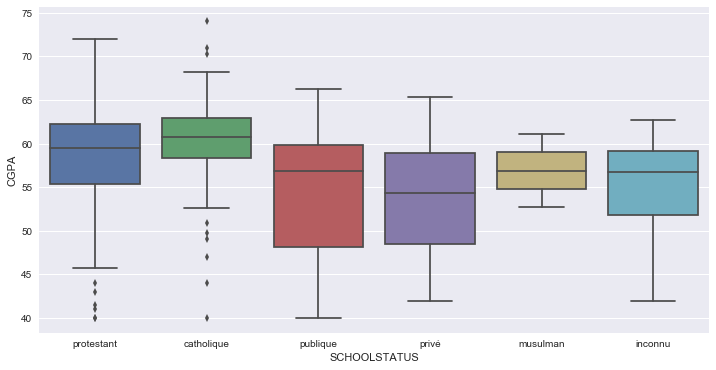

In [351]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Medecine)
plt.savefig('STATUS-CGPA.png',dpi=100)

A.4 Sexe :

In [ ]:
Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [350]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,117.513228,117.513228,2.438159,0.119733
Residual,240.0,11567.408056,48.197534,NaN,NaN


On conclus sans hesiter que la moyenne est la pour les filles que pour les garcons

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,11029.880734,60.066542,20.990826,58.444954,1.440367
H,10771.210526,58.916365,21.894737,57.044361,1.496241


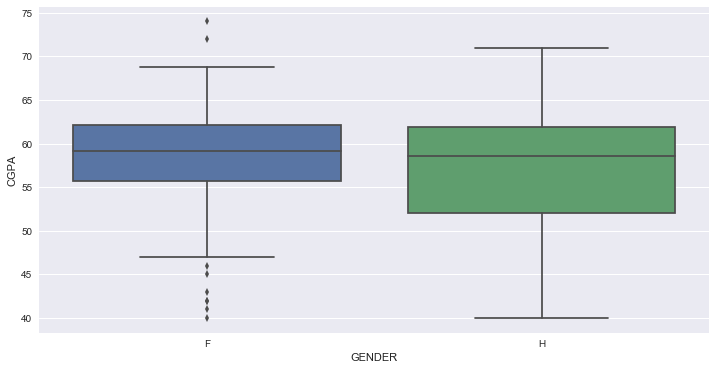

In [353]:
Medecine.groupby('GENDER').mean()
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Medecine)
plt.savefig('GENDER-CGPA.png',dpi=100)

On Peut Remarquer que les filles on des meilleurs resulat que les garcons en Faculté de medecine surtout en terme des disticntions

A.6 GPA - SCHOOL

In [354]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),93.0,5751.643494,61.845629,1.542681,0.009244
Residual,148.0,5933.277790,40.089715,NaN,NaN


Nous allons verifier comment se presente cette moyenne dans les 10 écoles les plus representée

In [359]:
SchoolGroup=Medecine.groupby('SCHOOL_RIGHT').mean()

In [368]:
SchoolGroup.columns

Index([u'ID', u'DIPPERC', u'AGE', u'CGPA', u'NACADYEAR'], dtype='object')

In [370]:
SchoolGroup.shape

(94, 5)

In [373]:
SchoolGroup.sort(axis=0,columns='CGPA',ascending=False,inplace=True)

In [374]:
SchoolGroup.reset_index(inplace=True)

In [427]:
SchoolGroup.loc[ range(0,6) + range(89,94)].SCHOOL_RIGHT

0              alfajiri
1       Institut NJANJA
2     idap isp rutshuru
3           mama mulezi
4                 bwito
5              bsangani
89          neema kwetu
90            de bukavu
91               masisi
92                 amen
93               hekima
Name: SCHOOL_RIGHT, dtype: object

In [432]:
Medecine.shape

(242, 14)

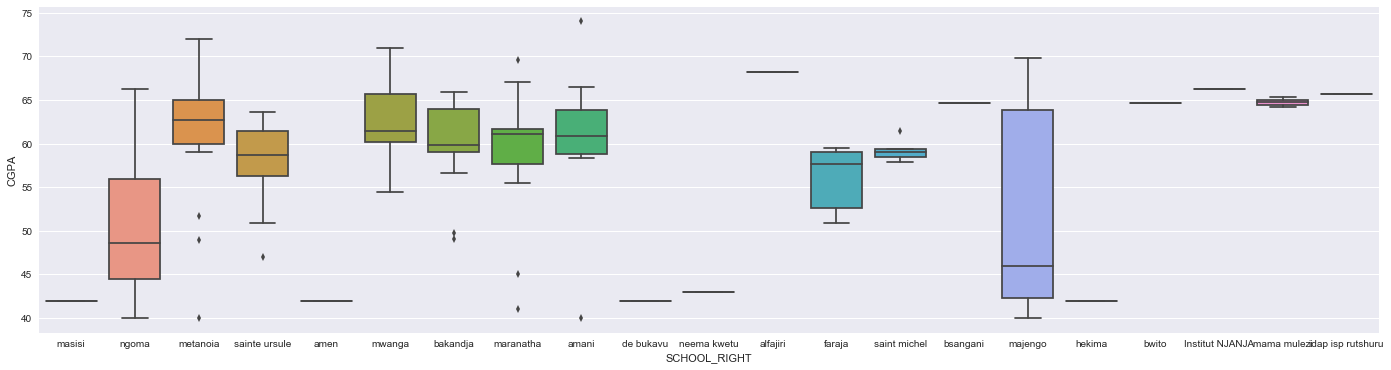

In [437]:
Medecine.groupby('SCHOOL_RIGHT').mean()
plt.figure(figsize=(24,6))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA", data=Medecine.loc[operator.or_(Medecine.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,6) + range(89,94)].SCHOOL_RIGHT) 
             , Medecine.SCHOOL_RIGHT.isin(Medecine.SCHOOL_RIGHT.value_counts()[:10].index))])
plt.savefig('SCHOOL_RIGHT-CGPA.png',dpi=100)

Sur cette figure comment se repartissent le CGPA dans Les 20 ecoles dont 10 sont les plus representes et 5 sont ceux qui on une grande moyenne et 5 ceux qui ont une faible moyyenne
on remarque que les étudiant provenant des écoles comme lycée sainte ursule, mwanga, bakanja ,alfagiri, faraja,amani, n'echouent presque pas en faculté de medecine

In [436]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [438]:
OptionGroup=Medecine.groupby('OPTION_RIGHT').mean()

In [442]:
OptionGroup.sort(axis=0,columns='CGPA',ascending=False,inplace=True)

In [443]:
OptionGroup

,ID,DIPPERC,AGE,CGPA,NACADYEAR
OPTION_RIGHT,,,,,
secretariat,11686.000000,54.000000,20.000000,62.500000,1.000000
commerciale informatique,10982.750000,55.000000,21.500000,60.200001,1.500000
vétérinaire,10726.500000,57.469131,20.750000,59.000000,1.750000
bio-chimie,10827.522523,61.590090,21.000000,58.831532,1.531532
agronomie,11523.000000,65.000000,20.000000,58.500000,1.000000
nutr,11319.857143,60.634037,20.428571,58.375000,1.428571
commmerciale et adm,9272.600000,51.200000,25.400000,57.450000,1.600000
latin philo,10803.666667,58.166667,21.083333,57.329167,1.583333
pedagogie,11160.875000,58.664094,22.416667,56.628125,1.312500


In [444]:
pearsonr(OptionGroup.DIPPERC,OptionGroup.CGPA)

(0.024778204523123036, 0.93596027075298815)

Dans cette table nous pouvons voir la réparttion des moyennes des poucentage selon les option!
voyons en image à quoi ça ressemble

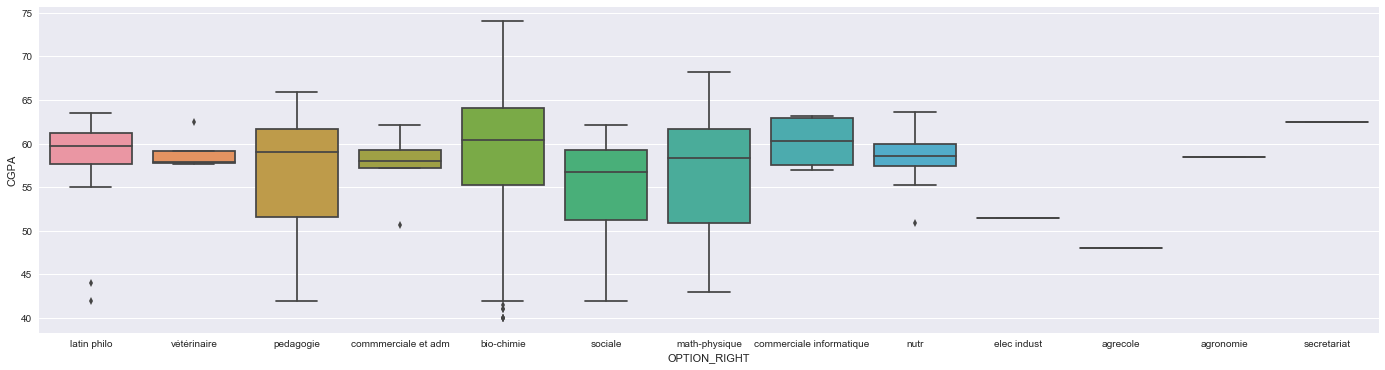

In [441]:
plt.figure(figsize=(24,6))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Medecine)
plt.savefig('OPTION_RIGHT-CGPA.png',dpi=100)

Sur la table on remarque que l'option n'a aucune influance sur notre variable CGPA mais notons que la moyenne la plus élevé vient de l'option sécretariat

In [451]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),12.0,608.756098,50.729675,1.048837,0.405075
Residual,229.0,11076.165186,48.367534,NaN,NaN


##### Faculté de TechNologies

In [501]:
Techno=datasetFin.loc[datasetFin.FAC=='FSTA']

A.0 Distribution du CGPA

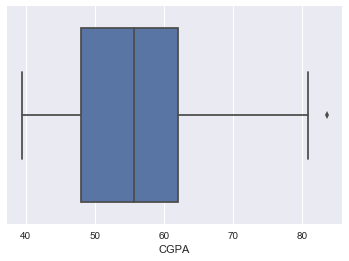

In [540]:
plt.figure()
ax = sns.boxplot(x=Techno['CGPA'])
plt.savefig('CGPATech.png',dpi=100)

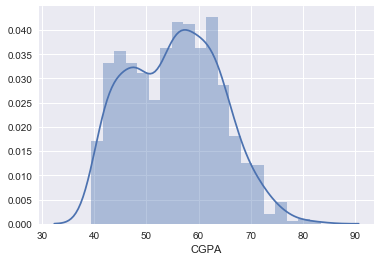

In [541]:
plt.figure()
sns.distplot(Techno['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistMed.png',dpi=100)

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

#### B.1 Attribue Age, Diplome Percentage Vs CGPA

In [461]:
Techno.corr()['CGPA'].sort_values()

ID          -0.239869
AGE         -0.032067
DIPPERC      0.346685
NACADYEAR    0.463141
CGPA         1.000000
Name: CGPA, dtype: float64

- Diplome PErcentage : Le coefiicient de correlation de pearson est de 0.34 donc il n'yas pas un lien considerable entre le pourcentage du diplome d'etat et le CGPA
- Meme conclusion Pour l'age

#### B.2 Gender 

In [462]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,232.763899,232.763899,3.04747,0.081204
Residual,901.0,68817.820379,76.379379,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

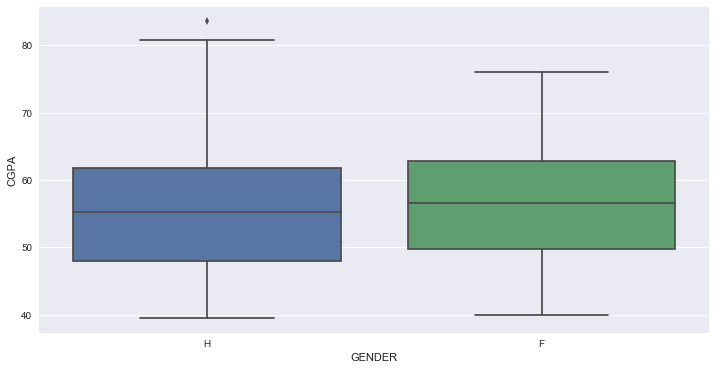

In [463]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Techno)
plt.savefig('GENDER-CGPA-Tech.png',dpi=100)

In [465]:
Techno.GENDER.value_counts()/len(Techno)

H    0.844961
F    0.155039
Name: GENDER, dtype: float64

Nous remarquons que les 2 graphiques sont les memes , memes il ya un desequilibre car la facultée est constitué par 85% des hommes et 15% des femmes 

In [466]:
Techno.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,9361.742857,60.905379,22.271429,56.604940,2.035714
H,9130.601573,58.581266,23.498034,55.202206,1.858453


Mais on peut remarquer ques les femmes reussient bien legerement que les homme!

#### B.4 Attribue Province

In [467]:
Techno.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [476]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),11.0,1388.355204,126.214109,1.662032,0.07731
Residual,891.0,67662.229073,75.939651,NaN,NaN


PR =0.078 est superieur à 0.05 On ne conclut pas imediatemen

In [472]:
Techno.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLPROVINCE,,,,,
KASAI ORIENTAL,9162.000000,66.000000,22.000000,61.599998,3.000000
inconnu,6095.800000,56.950609,26.200000,58.213333,2.600000
SUD-KIVU,8610.916667,58.295153,23.800926,56.657716,2.064815
KASAI OCCIDENTAL,7537.000000,56.000000,24.000000,55.433333,3.000000
NORD-KIVU,9360.864697,59.220456,22.958009,55.199728,1.828927
ORIENTALE,9563.125000,59.437500,24.437500,54.013541,1.875000
KINSHASA,8379.400000,59.400000,30.800000,52.480000,2.000000
KATANGA,10921.166667,56.666667,23.166667,50.861111,1.333333
K OR,7683.000000,55.000000,33.000000,49.100000,2.000000


Nous remarquons que la moyenne de GPA est superieur Pour la province Kasai oriental , ensuite vienne la province du sud-Kivu , le kasai occiental et la province du Nord Kivu

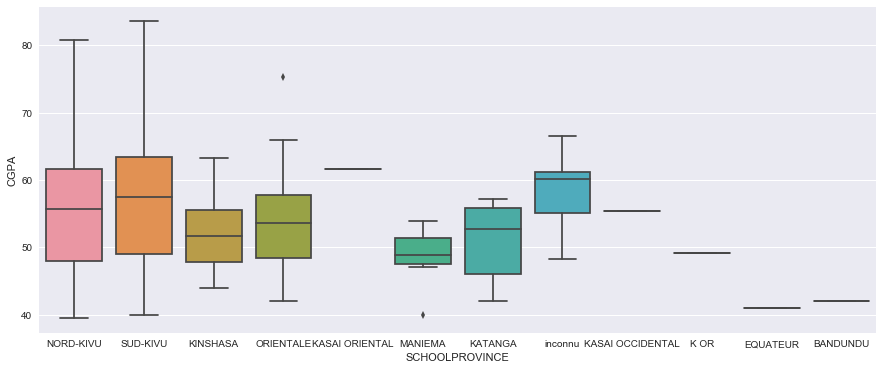

In [474]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Techno)
plt.savefig('GENDER-SCHOOLPROVINCE-Tech.png',dpi=100)

Sur le graphique on conclu Rapidement que les étudiant provenant de la province du sud Kivu sont plus performant en faulté de Technologie

#### B.5 Stattus de L'école 

In [477]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),7.0,5417.817584,773.973941,10.886006,3.123579e-13
Residual,895.0,63632.766694,71.098063,NaN,NaN


Il ya un lien entre les moyennes de CGPA pour les differents status de l"ecole

In [478]:
Techno.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8943.467422,61.121813,23.116147,58.326393,2.011331
autodidacte,9656.222222,59.888889,24.888889,54.787963,2.000000
protestant,9337.902326,58.241286,22.995349,54.296008,1.739535
inconnu,8644.352000,56.811061,24.800000,53.958533,2.120000
publique,9611.635659,57.348837,22.976744,52.992959,1.728682
privé,9754.985714,56.742857,22.985714,51.556667,1.571429
musulman,10336.000000,61.000000,23.000000,51.150000,2.000000
kimbanguiste,12064.000000,55.000000,23.000000,47.000000,1.000000


Nous remarquons que les éetudiant venant des écoles catholiques reussiseent mieux en faculté de techno , ensuite les autodidacte ,ensuite ceux des ecoles protestatntes

Voyons cela de plus pret avec box-plot

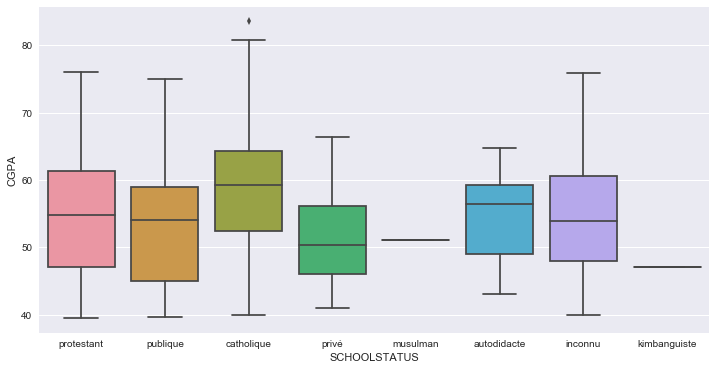

In [479]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Techno)
plt.savefig('GENDER-SCHOOLSTATUS-Tech.png',dpi=100)

#### B.Les Ecoles de provenances

In [480]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),215.0,26367.460860,122.639353,1.973924,3.939156e-11
Residual,687.0,42683.123418,62.129728,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [504]:
SchoolGroup=Techno.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [505]:
SchoolGroup.reset_index(inplace=True)

In [506]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,nikisi,4249.000000,58.000000,26.000000,75.349998,2.000000
1,technique ind. de mahamba,12228.000000,62.000000,24.000000,71.900002,1.000000
2,INST DE KATWA,3992.000000,67.000000,27.000000,68.900002,2.000000
3,mululusake,11662.000000,73.000000,19.000000,68.500000,1.000000
4,cirezi,8139.500000,58.750000,22.000000,65.970834,3.250000
5,vungi,8077.666667,55.000000,23.666667,64.772222,2.666667
6,itfm/bukavu,7963.804878,58.777476,23.902439,64.395529,2.048780
7,saint michel,10016.000000,60.000000,23.000000,64.049999,2.000000
8,katana,9144.000000,57.000000,22.000000,63.466667,3.000000
9,it bugabo,10308.000000,50.000000,22.000000,62.799999,2.000000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

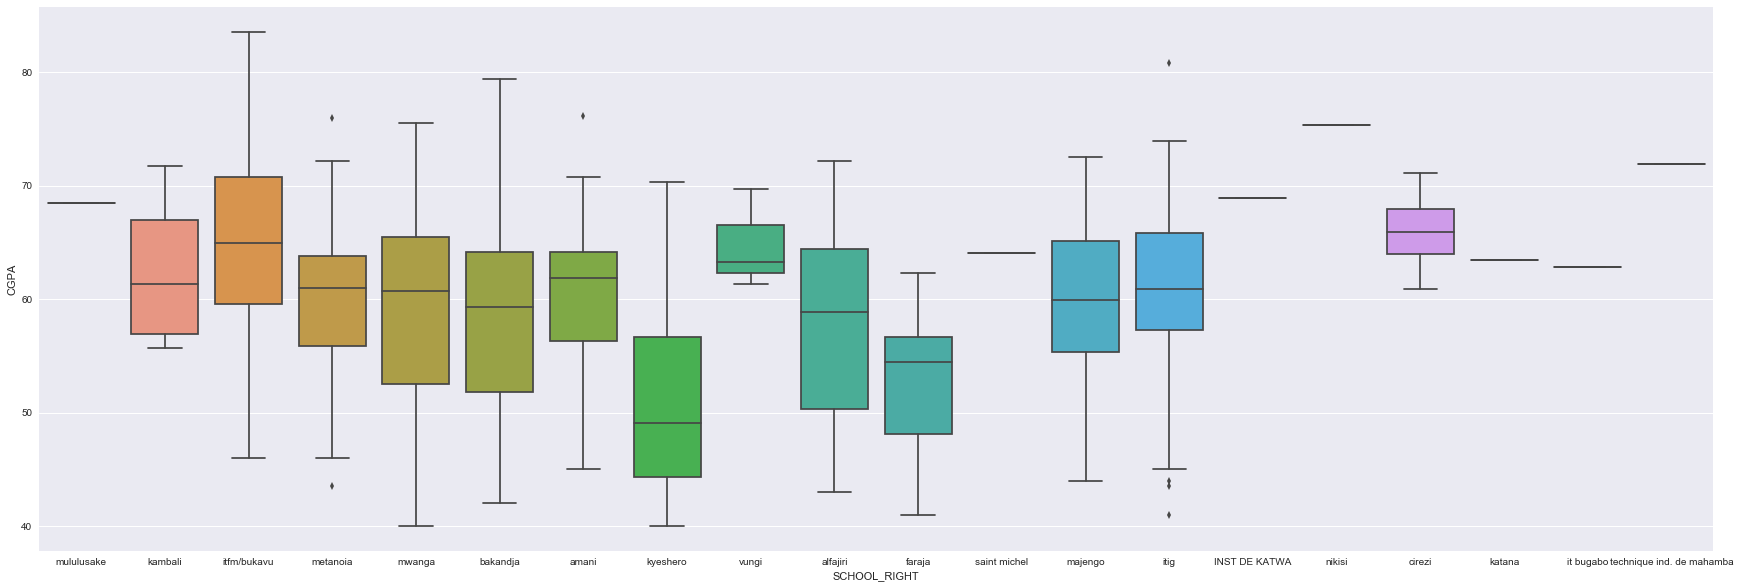

In [519]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA", data=Techno.loc[operator.or_(Techno.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Techno.SCHOOL_RIGHT.isin(Techno.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPA.png',dpi=100)

On remarques sur la figure que les grandes écoles connus on une bonne moyenne et un bon maximun de CGPA comme le lycée Amani, l'ITIG , l'ITFM!

#### B.7 OPTION DU DIPLOME 

In [521]:
len(Techno.OPTION_RIGHT.value_counts())

23

In [499]:
datasetFin.loc[datasetFin.SCHOOL_RIGHT=='itfm maendeleo','SCHOOL_RIGHT']='itfm/bukavu'

In [503]:
Techno.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8951.403955,61.124294,23.107345,58.297222,2.008475
autodidacte,9656.222222,59.888889,24.888889,54.787963,2.000000
protestant,9337.902326,58.241286,22.995349,54.296008,1.739535
inconnu,8644.352000,56.811061,24.800000,53.958533,2.120000
publique,9594.906250,57.312500,23.000000,53.031966,1.734375
privé,9754.985714,56.742857,22.985714,51.556667,1.571429
musulman,10336.000000,61.000000,23.000000,51.150000,2.000000
kimbanguiste,12064.000000,55.000000,23.000000,47.000000,1.000000


Nous pouvons constater que nous avons 23 options differents Voyons comment evoluer la moyenne

In [522]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),22.0,11622.024556,528.273843,8.094944,1.055221e-23
Residual,880.0,57428.559721,65.259727,NaN,NaN


In [500]:
datasetFin.loc[datasetFin.SCHOOL_RIGHT=='itfm maendeleo','SCHOOLSTATUS']='catholique'

La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs 

In [527]:
GroupOption=Techno.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

Voila comme on pourait s'y attendre les options techniques et Scientifiques viennent en tete de liste et en bas de l'echel vient les ption littereraires et commerciales

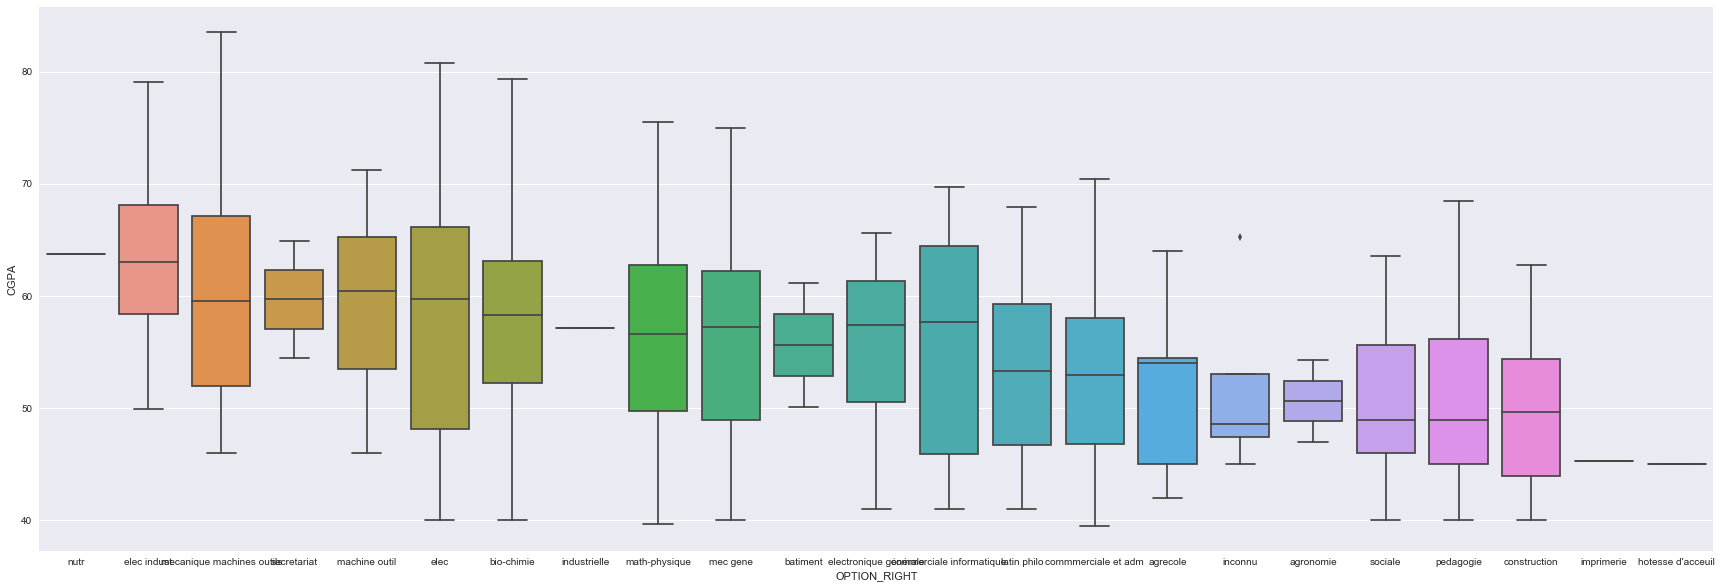

In [529]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Techno,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPA.png',dpi=100)

cela peut se remarquer aisement sur la figures que les sections techniques sont ceux dont le étudiants reussisnet le mieux

In [530]:
datasetFin.to_csv('DatasetFinalV1.csv')
Techno.to_csv("DatasetTechno.csv")
Medecine.to_csv('DatasetMedecine.csv')

##### Faculté D'Economie

In [549]:
Economie=datasetFin.loc[datasetFin.FAC=='FSEG']

In [550]:
Economie.shape

(1549, 14)

In [551]:
Techno.shape

(903, 14)

Nous voici enfin au sein de la faculté d'économie ! Commencons par voir la répartition des probabilitées de notre variable CGPA

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

A.0 Distribution du CGPA

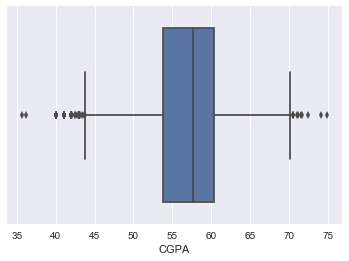

In [552]:
plt.figure()
ax = sns.boxplot(x=Economie['CGPA'])
plt.savefig('CGPA-ECO.png',dpi=100)

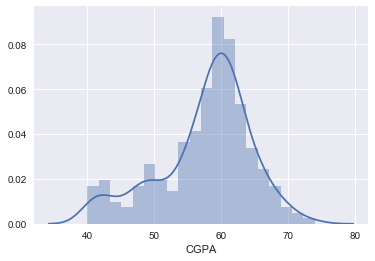

In [553]:
plt.figure()
sns.distplot(Medecine['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistEco.png',dpi=100)

Il suit une distribution presque normale d'écart type : 6.23

In [555]:
np.std(Economie.CGPA)

6.2672402214029903

In [557]:
np.mean(Economie.CGPA)

56.446099617754676

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

In [559]:
Economie.corr()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
ID,1.000000,-0.015651,-0.673470,-0.295749,-0.065568
DIPPERC,-0.015651,1.000000,-0.131960,0.288451,0.171187
AGE,-0.673470,-0.131960,1.000000,0.085321,-0.025793
CGPA,-0.295749,0.288451,0.085321,1.000000,0.302593
NACADYEAR,-0.065568,0.171187,-0.025793,0.302593,1.000000


Nous pouvons aisement qu'il n'yas aucune correlation entre le le CGPA et le pourcentage à l'exetat  ni meme l'age des étudiants

#### C.2 GENDER

In [560]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Economie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,11.697922,11.697922,0.297494,0.585536
Residual,1547.0,60830.388767,39.321518,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

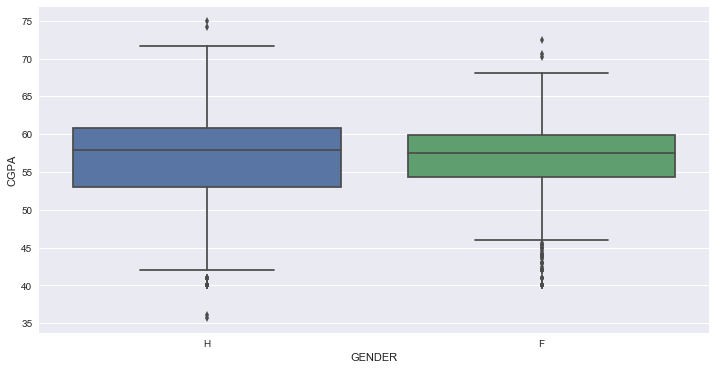

In [562]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Economie)
plt.savefig('GENDER-CGPA-Eco.png',dpi=100)

In [564]:
Economie.GENDER.value_counts()/len(Economie)

H    0.531311
F    0.468689
Name: GENDER, dtype: float64

Nous remarquons que les 2 graphiques sont les memes , equilibre car la facultée est constitué par 53% des hommes et 46% des femmes 

In [565]:
Economie.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,8676.130854,56.644475,23.617080,56.538625,1.917355
H,8176.019441,56.998485,24.946537,56.364480,1.916160


Mais on peut remarquer que les moyenees restent la meme 

#### B.4 Attribue Province

In [467]:
Techno.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [566]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Economie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),10.0,666.899640,66.689964,1.704509,0.074467
Residual,1538.0,60175.187048,39.125609,NaN,NaN


PR =0.078 est superieur à 0.05 , On ne conclus pas Imediatement que les moyennes sont les meme, ils peuvent ou ne peuvznt pas etre les memes

In [568]:
EchoGroup=Economie.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

In [569]:
EchoGroup.reset_index(inplace=True
                     )

In [570]:
EchoGroup

,SCHOOLPROVINCE,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,BAS CONGO,6223.000000,51.000000,27.000000,61.150002,2.000000
1,inconnu,5873.000000,60.062957,28.900000,60.363333,1.900000
2,NORD-KIVU,8417.178955,56.786587,24.122888,56.596275,1.924731
3,BANDUNDU,8907.000000,53.500000,24.500000,56.016667,2.500000
4,SUD-KIVU,8222.881250,57.131250,25.237500,55.962396,1.937500
5,KINSHASA,8691.433333,57.933333,25.000000,55.115555,1.633333
6,KATANGA,7409.250000,58.000000,25.750000,55.050000,2.000000
7,EQUATEUR,6751.500000,56.500000,24.000000,55.049999,1.500000
8,ORIENTALE,9735.791667,56.203188,24.250000,54.071528,1.708333
9,KASAI ORIENTAL,10078.200000,54.000000,27.600000,52.825000,2.000000


Nous remarquons que la moyenne de GPA est superieur Pour la province Bas congo , ensuite vienne la province du Nord kivu, le kasai bandudu et la province du Sud Kivu

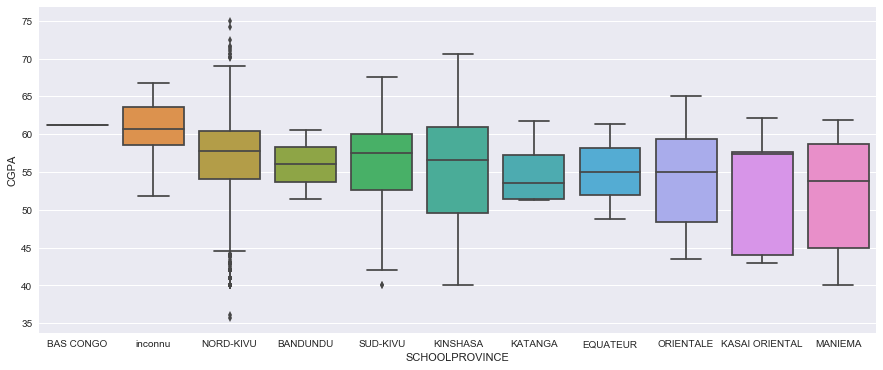

In [571]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Economie,order=EchoGroup.SCHOOLPROVINCE)
plt.savefig('GENDER-SCHOOLPROVINCE-Tech.png',dpi=100)

On remarque que la province du Kasie orientale est la pire province en faculté d'economie car 75% des étudiants provenant de cette province on moins de 57% au CGPA ,ceux qui distinguent le plus proviennent de la province du nord kivu,etc..

In [573]:
len(datasetFin.loc[datasetFin.SCHOOLPROVINCE=='inconnu'])

24

#### B.5 Stattus de L'école 

In [574]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Economie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),7.0,2850.635647,407.233664,10.821372,2.218935e-13
Residual,1541.0,57991.451042,37.632350,NaN,NaN


Il n'ya aucun lien entre les moyennes de CGPA pour les differents status de l"ecole

In [575]:
Economie.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8518.012526,58.694425,23.741127,57.987961,2.002088
protestant,8241.739669,56.034614,24.117769,56.668974,1.940083
publique,8284.400922,56.414178,24.631336,55.865630,1.875576
inconnu,7997.815789,56.346247,26.388158,55.165241,1.940789
kimbanguiste,10421.500000,54.000000,23.000000,55.133333,2.000000
musulman,8901.647059,55.110384,24.529412,54.968627,1.647059
privé,8973.063158,55.336192,24.278947,54.054649,1.705263
autodidacte,8521.125000,54.125000,25.000000,50.989583,1.625000


Nous remarquons que les éetudiant venant des écoles catholiques reussiseent mieux en faculté d'econome , ensuite les autodidacte ,ensuite ceux des ecoles protestatntes

Voyons cela de plus pret avec box-plot

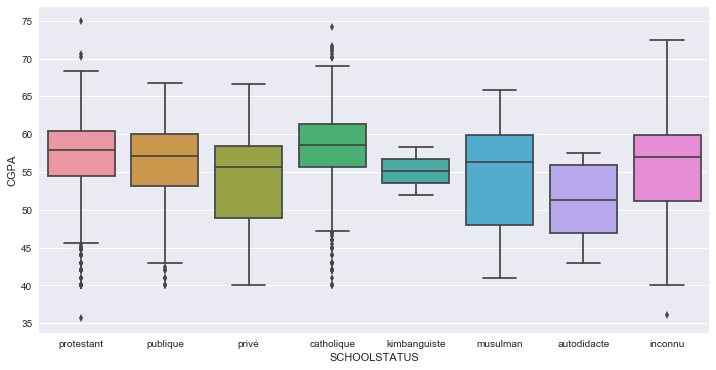

In [577]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Economie)
plt.savefig('-SCHOOLSTATUS-ECO.png',dpi=100)

Nous remarquons que les celles étudiants qui distingunt c'est ceux provennant des écoles protestants et catholiques

#### B.Les Ecoles de provenances

In [578]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Economie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),260.0,20026.184839,77.023788,2.430588,1.884616e-24
Residual,1288.0,40815.901850,31.689365,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [579]:
SchoolGroup=Economie.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [580]:
SchoolGroup.reset_index(inplace=True)

In [581]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,shaloom,7221.00,53.000000,23.000000,66.624999,4.000000
1,it kasabinyole,6948.00,50.000000,27.000000,65.300003,1.000000
2,mulo,8005.50,59.500000,24.500000,64.799999,2.000000
3,avenir,9374.00,58.000000,22.500000,64.100000,3.000000
4,loyola,7223.00,73.000000,24.000000,63.825000,4.000000
5,action kusaidiya,4346.00,55.000000,32.000000,63.700001,1.000000
6,LYCEE MWANDU,3251.00,54.000000,30.000000,63.600001,3.000000
7,alfajiri,6521.50,60.250000,26.000000,63.566667,2.250000
8,kirumba,4554.00,51.000000,29.000000,63.200001,1.000000
9,ujasiri,5198.00,53.500000,27.000000,63.100001,1.500000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

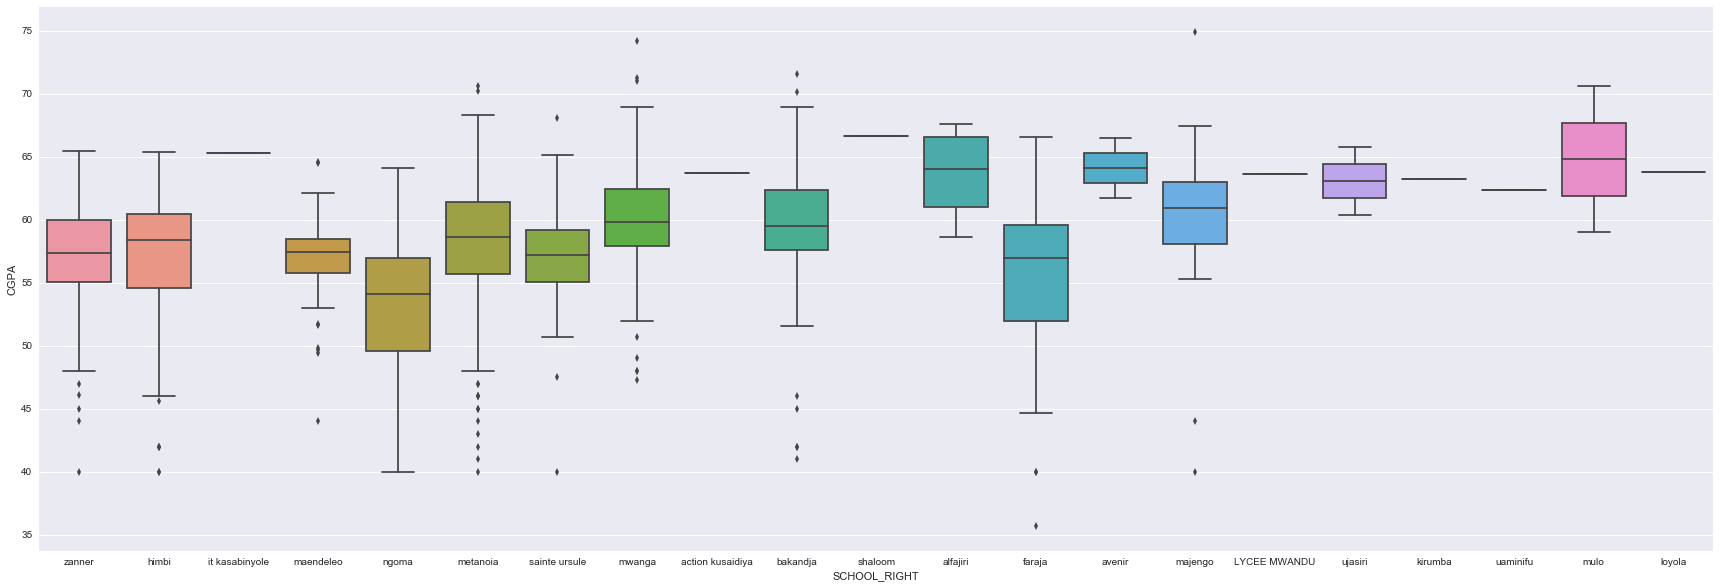

In [586]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA",  data=Economie.loc[operator.or_(Economie.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Economie.SCHOOL_RIGHT.isin(Economie.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPAECon.png',dpi=100)

On remarques sur la figure que les grandes écoles connus on une bonne moyenne et un bon maximun de CGPA comme le lycée Amani, l'ITIG , l'ITFM!

#### B.7 OPTION DU DIPLOME 

In [587]:
len(Economie.OPTION_RIGHT.value_counts())

21

Nous pouvons constater que nous avons 21 options differents Voyons comment evoluer la moyenne

In [588]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Economie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),20.0,3739.407704,186.970385,5.003106,3.534757e-12
Residual,1528.0,57102.678985,37.370863,NaN,NaN


La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs , certaines écoles on une bonne moyenne du GPA que d'autres donc elle depend de l'ecole de provenance

In [589]:
GroupOption=Economie.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

In [593]:
GroupOption

,OPTION_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,agrecole,9435.000000,68.000000,26.000000,63.450001,2.000000
1,inconnu,3389.333333,54.584348,29.333333,62.900000,1.000000
2,elec,7020.500000,53.000000,26.000000,62.533335,2.000000
3,economie,356.000000,60.000000,39.000000,59.900002,1.000000
4,bio-chimie,8033.025641,57.492798,24.352564,58.498932,2.019231
5,hotesse d'acceuil,4566.000000,55.000000,28.000000,58.400002,1.000000
6,math-physique,7214.666667,54.544679,26.619048,58.193056,2.214286
7,nutr,6793.333333,54.666667,24.000000,57.605555,1.666667
8,coupe couture,8284.750000,62.250000,23.500000,57.520833,2.250000
9,vétérinaire,8120.000000,50.000000,28.000000,57.400000,3.000000


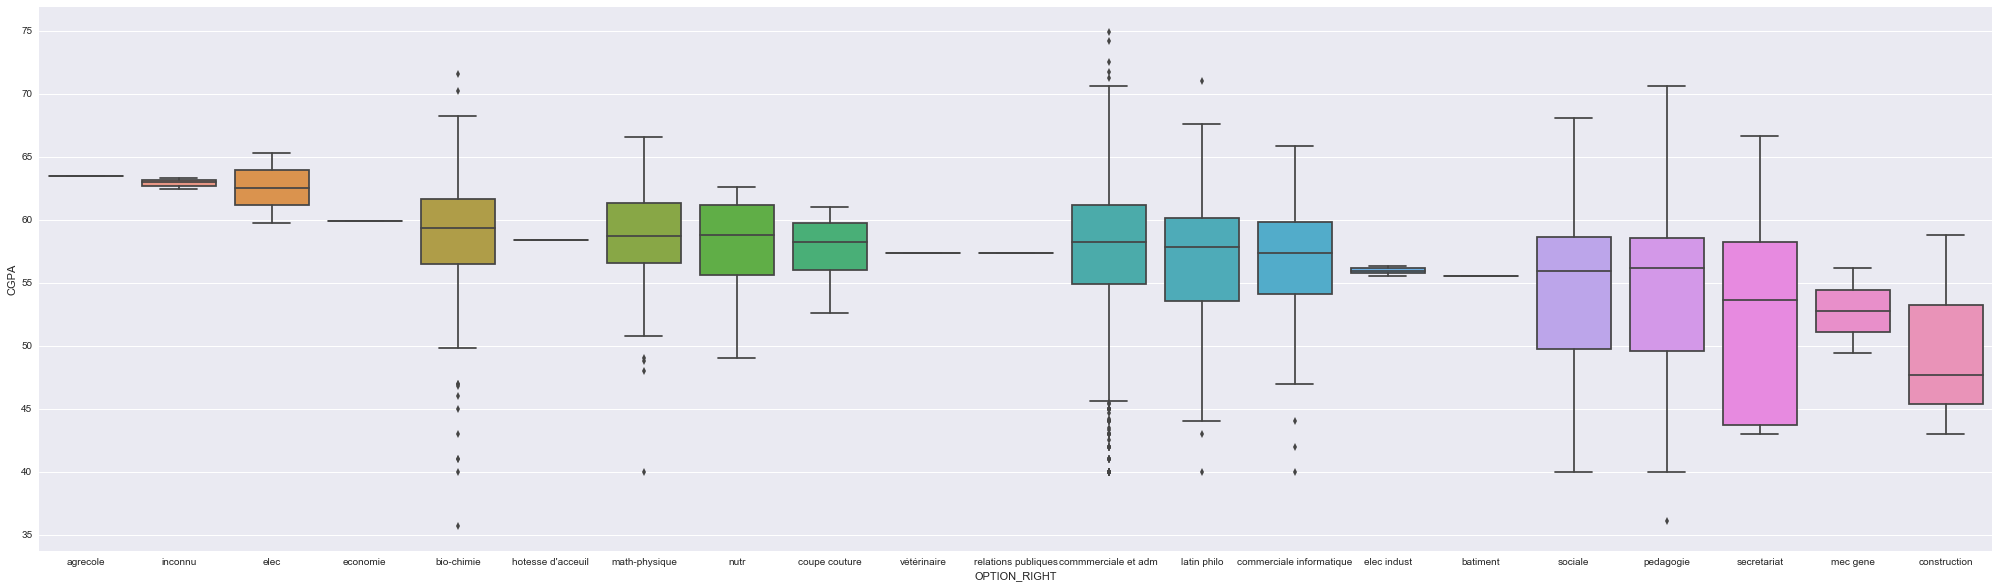

In [592]:
plt.figure(figsize=(35,10))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Economie,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPAEco.png',dpi=100)

cela peut se remarquer aisement sur la figures que les sections techniques sont ceux dont le étudiants reussisnet le mieux

On constate que le pourcentage de CGPA varie differament pour chaque option du diplome , les options peda, sociale ,vienne en dernier en ce qui concerne le cGPA mean 

Nous remarquons que les celles étudiants qui distingunt c'est ceux provennant des écoles protestants et catholiques, en queu de la liste se trouve les autodidacte

##### Faculté de Santé et Devellopement

In [627]:
Sante=datasetFin.loc[datasetFin.FAC=='FSDC']

In [596]:
Economie.shape

(1549, 14)

In [551]:
Techno.shape

(903, 14)

In [628]:
Sante.shape

(758, 14)

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

Nous voici enfin au sein de la faculté d'économie ! Commencons par voir la répartition des probabilitées de notre variable CGPA

A.0 Distribution du CGPA

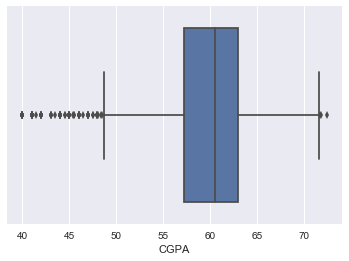

In [629]:
plt.figure()
ax = sns.boxplot(x=Sante['CGPA'])
plt.savefig('CGPA-ECO-Sante.png',dpi=100)

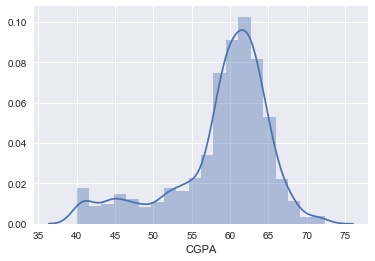

In [630]:
plt.figure()
sns.distplot(Sante['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistDroit.png',dpi=100)

Il suit une distribution presque normale d'écart type : 6.5

In [631]:
np.std(Sante.CGPA)

6.526651956504482

In [602]:
np.mean(Droit.CGPA)

58.022023761201453

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

In [632]:
Sante.corr()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
ID,1.000000,0.054474,-0.546904,0.067762,-0.009021
DIPPERC,0.054474,1.000000,-0.094969,0.196664,0.162441
AGE,-0.546904,-0.094969,1.000000,-0.062776,-0.111260
CGPA,0.067762,0.196664,-0.062776,1.000000,0.329851
NACADYEAR,-0.009021,0.162441,-0.111260,0.329851,1.000000


Nous pouvons aisement qu'il n'yas aucune correlation entre le le CGPA et le pourcentage à l'exetat  ni meme l'age des étudiants

#### C.2 GENDER

In [633]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Sante).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,77.581150,77.581150,1.820844,0.177617
Residual,756.0,32211.085657,42.607256,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

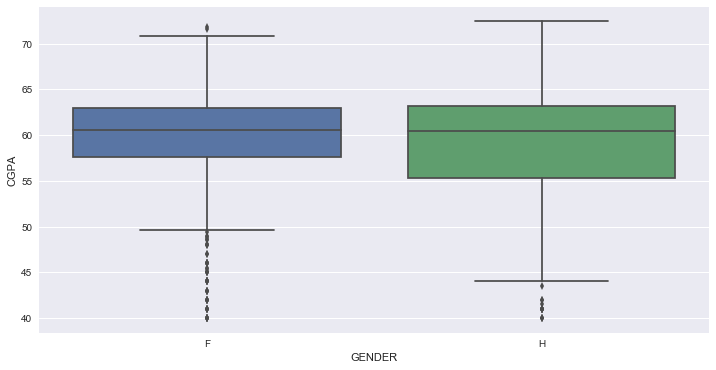

In [635]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Sante)
plt.savefig('GENDER-CGPA-Sante.png',dpi=100)

In [636]:
Sante.GENDER.value_counts()/len(Sante)

F    0.618734
H    0.381266
Name: GENDER, dtype: float64

Nous remarquons que les 2 graphiques sont les memes , equilibre car la facultée est constitué par 60% des femmes et 40% des hommes , c'est la faculté la plus feminine

In [637]:
Sante.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,8461.498934,55.481163,25.366738,59.168834,1.925373
H,7762.536332,55.082618,26.961938,58.510150,2.055363


Mais on peut remarquer que les moyenees restent la meme 

#### B.4 Attribue Province

In [638]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Sante).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),11.0,240.767767,21.887979,0.509501,0.897649
Residual,746.0,32047.899040,42.959650,NaN,NaN


PR =0.18 est superieur à 0.05 nous pouvons conclure que la moyenne est la meme sur toutes les facultés

In [467]:
Techno.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [639]:
SanteGroup=Sante.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

In [640]:
SanteGroup.reset_index(inplace=True
                     )

In [641]:
SanteGroup

,SCHOOLPROVINCE,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,KATANGA,8142.250000,63.000000,24.250000,61.591666,3.500000
1,KIGALI,5698.500000,53.438261,28.500000,61.550000,1.500000
2,ORIENTALE,8885.043478,54.240435,26.173913,60.647826,2.086957
3,KINSHASA,7973.200000,55.066667,27.333333,59.762222,2.133333
4,MANIEMA,8701.500000,53.500000,27.000000,59.700001,2.000000
5,OUEST,7394.000000,56.876522,29.000000,59.400002,1.000000
6,BANDUNDU,8105.833333,52.666667,30.000000,59.038889,2.500000
7,NORD-KIVU,8292.347315,55.198629,25.687919,58.919827,1.951342
8,KASAI OCCIDENTAL,4781.000000,51.000000,30.000000,58.900000,2.000000
9,KASAI ORIENTAL,5677.000000,60.000000,30.500000,58.750001,1.500000


Pour conclure cocernant la moyenne on tien compte du nombre des individu d'ou un boxplot est importtant

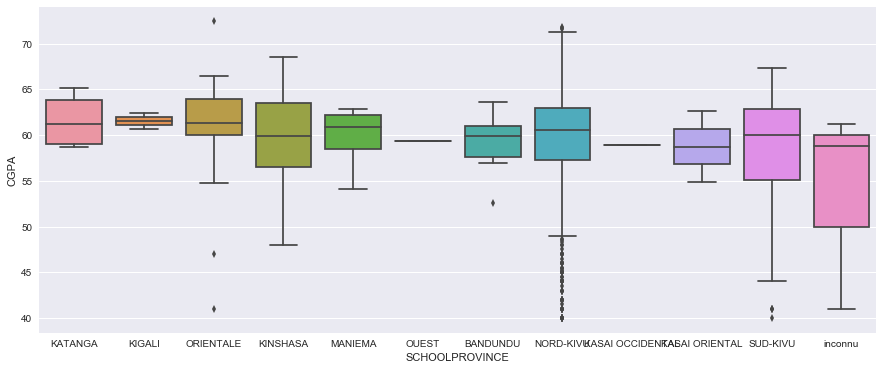

In [642]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Sante,order=SanteGroup.SCHOOLPROVINCE)
plt.savefig('GENDER-SCHOOLPROVINCE-Sante.png',dpi=100)

La tendance est inversé les étudiant de la province du sud et nord kivu echouent plus en faculté de sante, les distinctions provienent de la province oriantale et du sud kivu.

#### B.5 Stattus de L'école 

In [643]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Sante).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),6.0,1413.669221,235.611537,5.730989,0.000008
Residual,751.0,30874.997586,41.111848,NaN,NaN


Il n'ya aucun lien entre les moyennes de CGPA pour les differents status de l"ecole

In [644]:
Sante.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8367.889610,57.522120,25.012987,61.016017,2.142857
protestant,7915.912821,54.721810,26.107692,59.493077,2.000000
inconnu,7828.561644,54.749196,27.643836,58.156792,1.972603
publique,8195.568627,55.130719,25.686275,58.039107,1.836601
privé,8951.095745,54.127660,25.276596,57.616046,1.882979
autodidacte,8677.111111,59.888889,25.000000,55.796296,2.444444
musulman,9024.142857,50.714286,25.571429,53.292858,1.285714


Nous avons les écoles catholiques et musulman en tete de liste , mais les écoles musulmanes , privé , et autodidacte viennent en bas de l'echelle

Voyons cela de plus pret avec box-plot

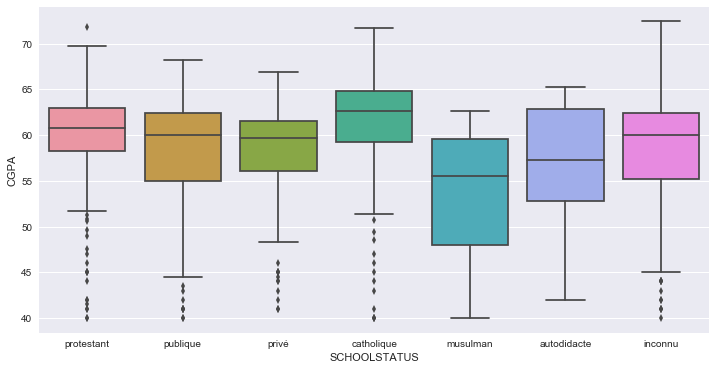

In [645]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Sante)
plt.savefig('SCHOOLSTATUS-ECO-Droit.png',dpi=100)

Nous remarquons que les celles étudiants qui distingunt c'est ceux provennant des écoles protestants et catholiques, en queu de la liste se trouve les autodidacte

#### B.Les Ecoles de provenances

In [646]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Sante).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),237.0,12362.421092,52.162114,1.361235,0.00223
Residual,520.0,19926.245715,38.319703,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [647]:
SchoolGroup=Sante.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [648]:
SchoolGroup.reset_index(inplace=True)

In [649]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,ITM DE BOGA,8498.000000,71.000000,45.000000,72.433334,3.000000
1,itm,6989.000000,56.876522,59.000000,71.300003,1.000000
2,malula,9846.000000,62.000000,20.000000,68.549999,2.000000
3,bibwe,9451.000000,51.000000,49.000000,67.333333,3.000000
4,maendeleo de oicha,10154.000000,56.000000,32.000000,67.200001,2.000000
5,kirumba,6987.000000,55.000000,39.000000,67.199997,1.000000
6,edap isp bkv,9827.000000,55.000000,23.000000,67.049999,2.000000
7,kasali,10053.000000,57.000000,25.000000,65.800003,2.000000
8,i katwa,6674.000000,53.000000,28.000000,65.599998,2.000000
9,mgr kataliko,8158.500000,56.500000,31.000000,65.416668,3.000000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

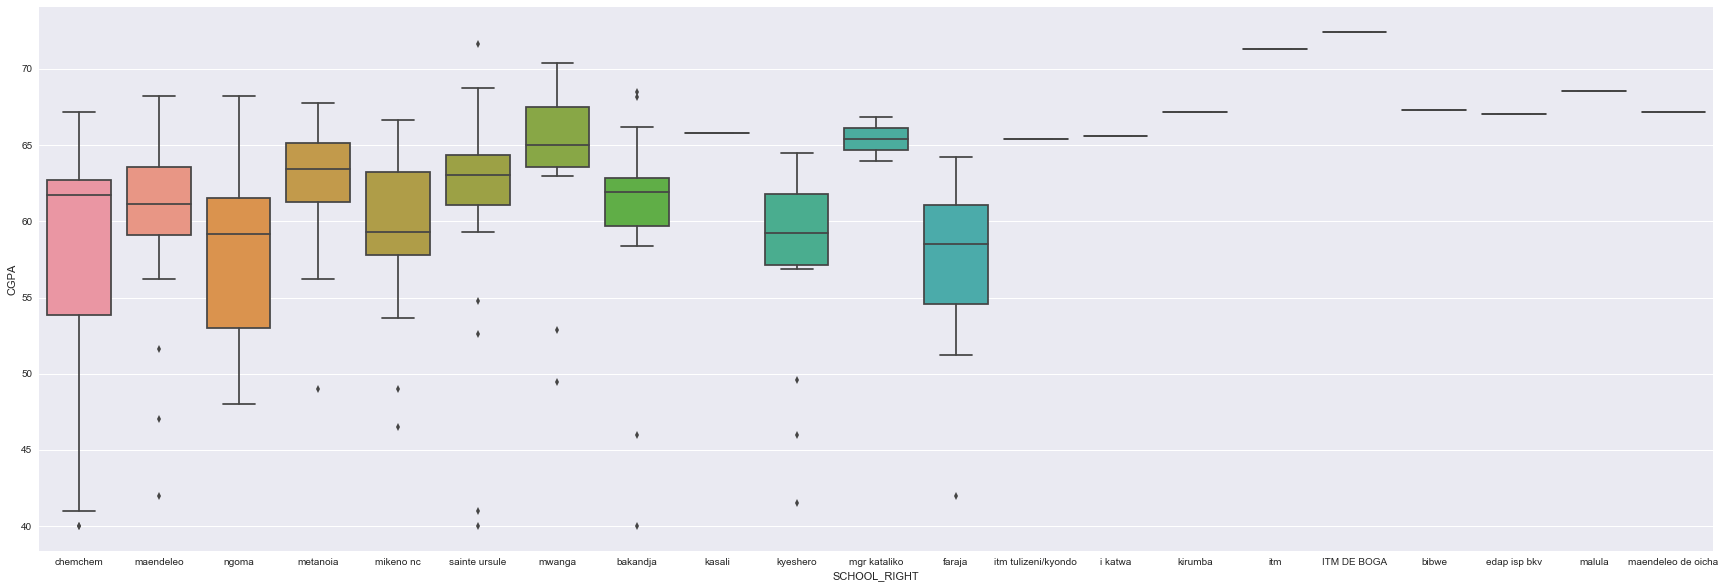

In [650]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA",  data=Sante.loc[operator.or_(Sante.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Sante.SCHOOL_RIGHT.isin(Sante.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPASante.png',dpi=100)

Les étudiant provenant des écoles suivantes echouent rarementen faculté de sante : Maendeleo, sainte ursule , bakandja

#### B.7 OPTION DU DIPLOME 

In [652]:
len(Sante.OPTION_RIGHT.value_counts())

15

Nous pouvons constater que nous avons 17 options differents Voyons comment evoluer la moyenne

In [653]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Sante).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),14.0,2256.496238,161.178303,3.987573,0.000001
Residual,743.0,30032.170569,40.420149,NaN,NaN


La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs , certaines écoles on une bonne moyenne du GPA que d'autres donc elle depend de l'ecole de provenance

In [654]:
GroupOption=Sante.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

In [655]:
GroupOption

,OPTION_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,vétérinaire,9157.600000,57.200000,33.800000,64.756667,2.600000
1,commerciale informatique,9240.000000,50.000000,23.000000,63.166668,3.000000
2,hotesse d'acceuil,9850.000000,50.000000,22.000000,62.600000,2.000000
3,inconnu,5693.400000,57.150609,39.800000,61.933335,1.400000
4,bio-chimie,7584.410256,54.622876,26.487179,61.615741,2.085470
5,latin philo,7856.148936,56.923543,25.680851,61.501596,2.085106
6,math-physique,7090.000000,54.625138,28.727273,60.657576,1.818182
7,diet,4769.500000,60.000000,26.500000,60.299999,1.000000
8,nutr,8030.702128,57.191489,24.148936,59.773227,2.085106
9,commmerciale et adm,8258.451613,55.354839,24.774194,59.697043,1.806452


Voila comme on pourait s'y attendre l'option latin philo est en tete de kiste les options commerciale , pedagogie , sociale , math-physique ,mec sont en bas de l'echele

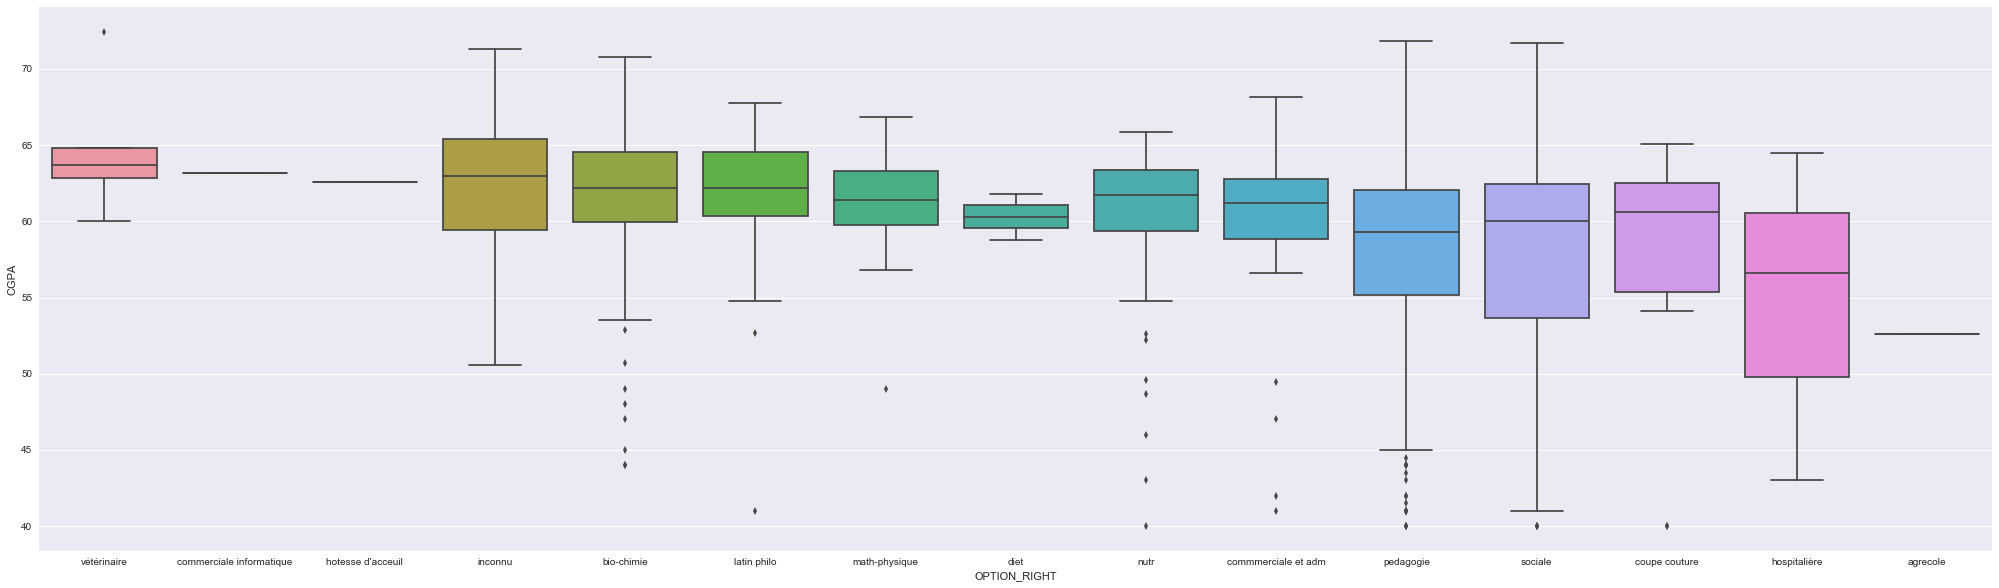

In [656]:
plt.figure(figsize=(35,10))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Sante,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPADroit.png',dpi=100)

Au sein de la faculté de sante certaines option comme : biochimie, latin-phil,nutrition, o on une meme moyenne

##### Faculté de Psycologie

In [657]:
Psyco=datasetFin.loc[datasetFin.FAC=='FPSE']

On constate que le pourcentage de CGPA varie differament pour chaque option du diplome , les options peda, sociale ,vienne en dernier en ce qui concerne le cGPA mean 

In [658]:
Psyco.shape

(227, 14)

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

A.0 Distribution du CGPA

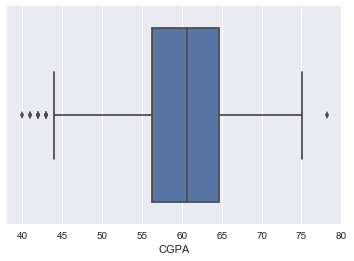

In [659]:
plt.figure()
ax = sns.boxplot(x=Psyco['CGPA'])
plt.savefig('CGPA-ECO-Psyco.png',dpi=100)

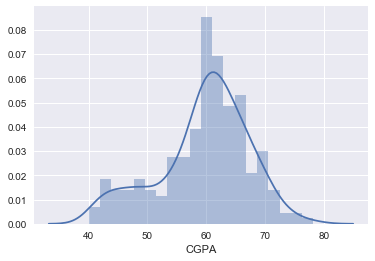

In [661]:
plt.figure()
sns.distplot(Psyco['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistPsycho.png',dpi=100)

Il suit une distribution presque normale d'écart type : 7,68

In [662]:
np.std(Psyco.CGPA)

7.6876434337029549

In [602]:
np.mean(Droit.CGPA)

58.022023761201453

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

In [663]:
Psyco.corr()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
ID,1.000000,0.111114,-0.607498,-0.152894,-0.079377
DIPPERC,0.111114,1.000000,-0.233634,0.327076,0.291769
AGE,-0.607498,-0.233634,1.000000,0.095474,-0.036995
CGPA,-0.152894,0.327076,0.095474,1.000000,0.434137
NACADYEAR,-0.079377,0.291769,-0.036995,0.434137,1.000000


Nous pouvons aisement qu'il n'yas aucune correlation entre le le CGPA et le pourcentage à l'exetat  ni meme l'age des étudiants

#### C.2 GENDER

In [664]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Psyco).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,16.096698,16.096698,0.270289,0.603649
Residual,225.0,13399.571877,59.553653,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

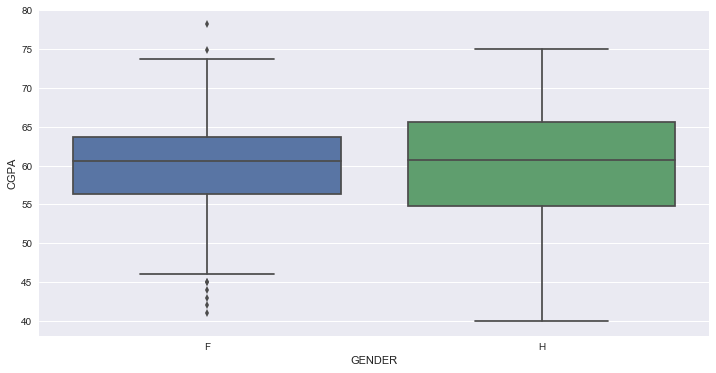

In [665]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Psyco)
plt.savefig('GENDER-CGPA-Eco.png',dpi=100)

In [666]:
Psyco.GENDER.value_counts()/len(Psyco)

F    0.524229
H    0.475771
Name: GENDER, dtype: float64

la faculté de psycho est aussi feminine avec 52% de femmes , et 48 des hommes

In [667]:
Psyco.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,8550.411765,56.377114,28.067227,59.812605,2.100840
H,8270.953704,56.009259,28.398148,59.279398,1.916667


Mais on peut remarquer que les moyenees restent la meme 

#### B.4 Attribue Province

In [668]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Psyco).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),7.0,335.677395,47.953914,0.802899,0.585665
Residual,219.0,13079.991180,59.725987,NaN,NaN


PR =0.58 est superieur à 0.05 nous pouvons conclure que la moyenne est la meme sur toutes les facultés

In [669]:
PsychoGroup=Psyco.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

In [670]:
PsychoGroup.reset_index(inplace=True
                     )

In [671]:
PsychoGroup

,SCHOOLPROVINCE,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,ORIENTALE,6709.000000,52.000000,38.000000,68.800001,3.000000
1,KASAI OCCIDENTAL,10342.000000,53.000000,36.000000,62.600000,2.000000
2,SUD-KIVU,7982.117647,56.176471,29.960784,60.612908,2.137255
3,NORD-KIVU,8500.976048,56.238782,27.520958,59.325948,1.988024
4,KINSHASA,12037.000000,61.500000,26.500000,59.150000,1.000000
5,inconnu,2523.000000,50.000000,38.000000,59.000000,1.000000
6,BANDUNDU,12037.000000,61.000000,25.000000,55.700001,1.000000
7,MANIEMA,9442.000000,54.000000,31.000000,52.261111,2.333333


Pour conclure cocernant la moyenne on tien compte du nombre des individu d'ou un boxplot est importtant

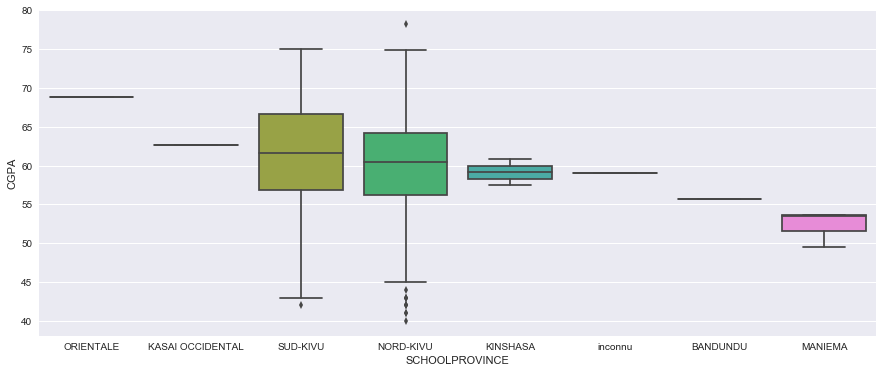

In [672]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Psyco,order=PsychoGroup.SCHOOLPROVINCE)
plt.savefig('GENDER-SCHOOLPROVINCE-Droit.png',dpi=100)

Nous remarquons que le moyenne du CGPA est la meme pour les provinces suivantes : Nord-Kivu, Sud-Kivu, Kinshasa , Orientale ,Maniema, les distinctions proviennent beaucoup plus des provincces du nord-kivu, sud kivu .

#### B.5 Stattus de L'école 

In [673]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Psyco).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),6.0,900.916938,150.152823,2.639575,0.017156
Residual,220.0,12514.751637,56.885235,NaN,NaN


la moyenne est presque la meme pour toutes les categories 

In [674]:
Psyco.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,9047.420000,59.460000,25.040000,62.376167,2.420000
inconnu,7796.695652,55.606011,31.065217,59.707790,2.195652
protestant,8059.927711,55.277108,28.891566,59.187651,1.939759
publique,8605.392857,55.107143,28.214286,58.550000,1.642857
privé,9650.125000,54.687500,25.875000,55.908333,1.500000
autodidacte,8311.333333,55.666667,34.000000,53.333333,1.000000
musulman,10482.000000,54.000000,22.000000,48.000000,1.000000


Les écoles catholiques viennent en tet ensuite vien t les écoles protestatnt et publiques 

Voyons cela de plus pret avec box-plot

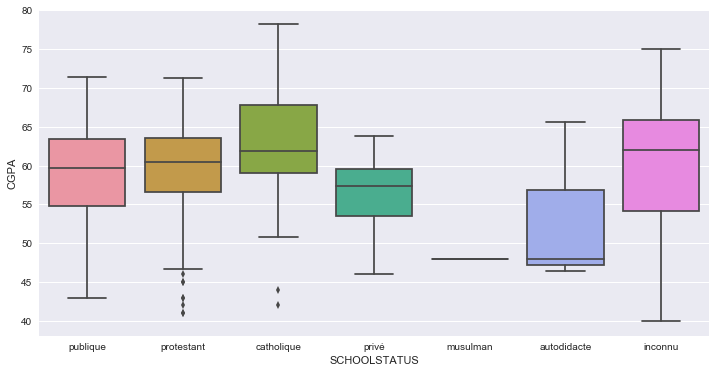

In [675]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Psyco)
plt.savefig('SCHOOLSTATUS-ECO-Psyco.png',dpi=100)

les étudiants issue des écoles privées catholiques, et protesstantes obtienent des bonnes notes au sein de la faculté de psycho

#### B.Les Ecoles de provenances

In [676]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Psyco).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),107.0,8727.908041,81.569234,2.070656,0.000061
Residual,119.0,4687.760534,39.392946,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [677]:
SchoolGroup=Psyco.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [678]:
SchoolGroup.reset_index(inplace=True)

In [679]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,wima,8594.000000,66.000000,24.000000,73.725000,4.000000
1,mawato,10701.000000,59.000000,23.000000,71.400002,2.000000
2,lwiro,9226.000000,57.000000,26.000000,70.750000,2.000000
3,malikia wa bingu,7040.000000,51.000000,41.000000,70.075001,4.000000
4,kanyabayonga,5662.000000,52.000000,25.000000,69.333333,3.000000
5,gs asteria urafiki,8578.000000,65.000000,29.000000,68.950001,4.000000
6,INST LWANGA,3298.000000,61.000000,33.000000,68.949997,2.000000
7,bsangani,7850.000000,55.500000,24.000000,68.924999,2.000000
8,amkeni,10049.000000,51.000000,35.000000,68.849998,2.000000
9,amani,9881.000000,66.000000,23.500000,68.837501,2.500000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

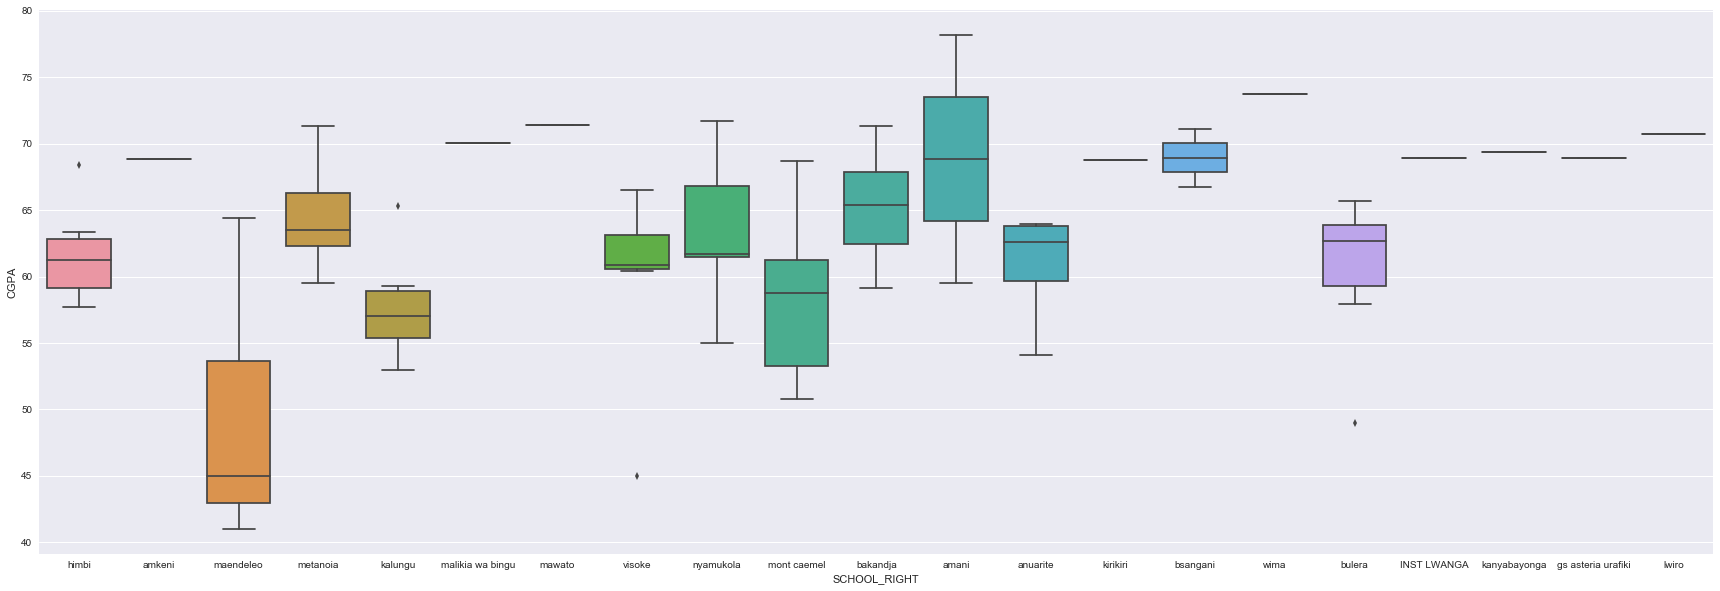

In [680]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA",  data=Psyco.loc[operator.or_(Psyco.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Psyco.SCHOOL_RIGHT.isin(Psyco.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPAPsyc.png',dpi=100)

Les éecoles comme : bakandja , amani , meta anuarite , ont des bonne notes au sein de cette faculté

#### B.7 OPTION DU DIPLOME 

In [684]:
len(Psyco.OPTION_RIGHT.value_counts())

7

Nous pouvons constater que nous avons 7 options differents Voyons comment evoluer la moyenne

In [685]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Psyco).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),6.0,1487.677327,247.946221,4.573123,0.000214
Residual,220.0,11927.991248,54.218142,NaN,NaN


La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs , certaines écoles on une bonne moyenne du GPA que d'autres donc elle depend de l'ecole de provenance

In [686]:
GroupOption=Psyco.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

In [687]:
GroupOption

,OPTION_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,bio-chimie,10142.000000,62.500000,22.750000,69.660418,2.250000
1,math-physique,7364.000000,53.500000,30.000000,64.724999,1.500000
2,latin philo,9708.166667,59.166667,24.416667,64.441667,2.416667
3,pedagogie,8168.439153,56.184532,29.031746,59.440123,2.005291
4,coupe couture,8242.000000,54.000000,29.000000,57.191666,2.500000
5,sociale,9751.937500,53.750000,23.437500,56.557292,1.875000
6,commmerciale et adm,11309.000000,52.000000,21.500000,42.500000,1.000000


contrairement aux idées reussis ceux qui reussisent plus en faculté de psycho sont les étudiant issues des section sientifique ensuite vient 'option latin philo et en 4eme position l'option pédagaogique

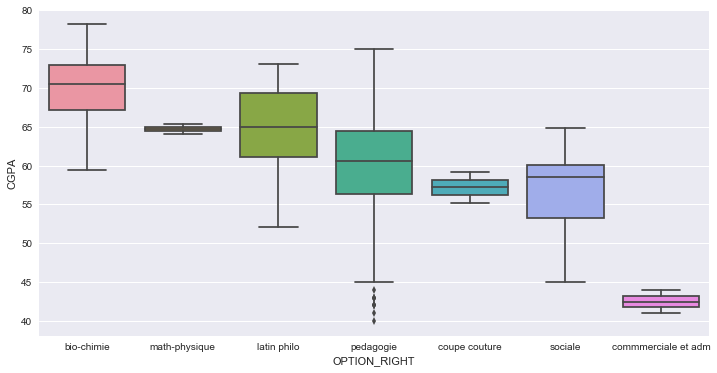

In [688]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Psyco,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPADroit.png',dpi=100)

On peut conclure que les étudiant issues de l'option commerciale et admin echouent plus au sein de cette faculté/

#### Faculté De Theologie

In [689]:
Teologie=datasetFin.loc[datasetFin.FAC=='FT']

In [690]:
Teologie.shape

(140, 14)

Nous voici enfin au sein de la faculté de theologie ! Commencons par voir la répartition des probabilitées de notre variable CGPA

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

A.0 Distribution du CGPA

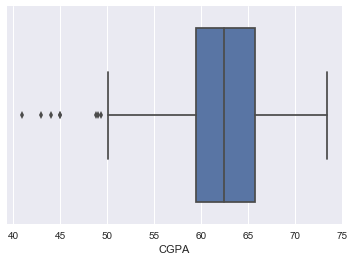

In [691]:
plt.figure()
ax = sns.boxplot(x=Teologie['CGPA'])
plt.savefig('CGPA-ECO.png',dpi=100)

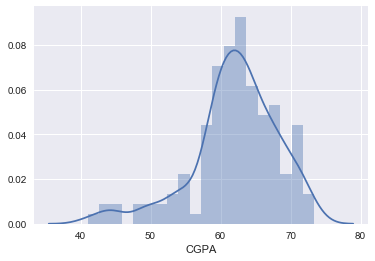

In [692]:
plt.figure()
sns.distplot(Teologie['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistteo.png',dpi=100)

Il suit une distribution presque normale d'écart type : 6.23

In [693]:
np.std(Teologie.CGPA)

6.2067599618743134

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

In [694]:
Teologie.corr()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
ID,1.000000,0.068864,-0.536884,-0.306211,-0.071491
DIPPERC,0.068864,1.000000,-0.176726,0.141674,0.186177
AGE,-0.536884,-0.176726,1.000000,0.148100,-0.089653
CGPA,-0.306211,0.141674,0.148100,1.000000,0.282592
NACADYEAR,-0.071491,0.186177,-0.089653,0.282592,1.000000


Nous pouvons aisement qu'il n'yas aucune correlation entre le le CGPA et le pourcentage à l'exetat  ni meme l'age des étudiants

#### C.2 GENDER

In [695]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Teologie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,4.122392,4.122392,0.105561,0.745748
Residual,138.0,5389.219299,39.052314,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

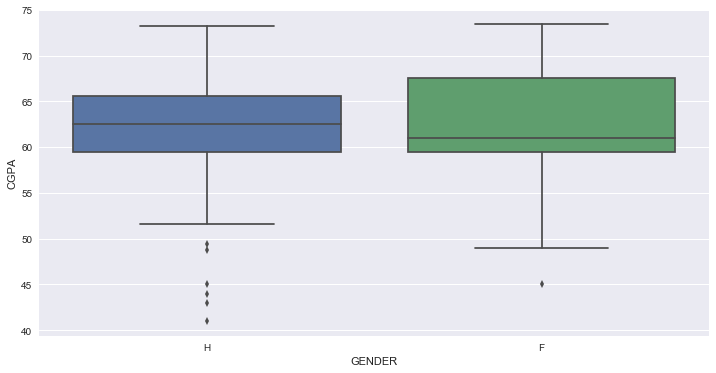

In [696]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Teologie)
plt.savefig('GENDER-CGPA-Teologie.png',dpi=100)

In [697]:
Teologie.GENDER.value_counts()/len(Teologie)

H    0.821429
F    0.178571
Name: GENDER, dtype: float64

il ya un desiquilibre car le femmes c'est uniquemen 20% des étudiant ausein de la faculté

In [698]:
Teologie.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,7894.28000,53.080000,28.8,61.631667,2.000000
H,8175.46087,53.973913,32.0,62.079710,2.104348


Mais on peut remarquer que les moyenees restent la meme 

#### B.4 Attribue Province

In [467]:
Techno.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [699]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Teologie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),5.0,462.025874,92.405175,2.510951,0.033001
Residual,134.0,4931.315817,36.800864,NaN,NaN


PR =0.033 est inferieur à 0.05 nous pouvons conclure que la moyenne n'est pas la meme au sein de chaque faculté

In [700]:
TeolGroup=Teologie.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

In [701]:
TeolGroup.reset_index(inplace=True
                     )

In [702]:
TeolGroup

,SCHOOLPROVINCE,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,ORIENTALE,9313.666667,57.000000,48.333333,62.633333,2.000000
1,NORD-KIVU,8148.727273,53.504132,30.809917,62.231061,2.090909
2,SUD-KIVU,7340.307692,55.538462,33.461538,61.689744,2.000000
3,KINSHASA,8576.000000,65.000000,25.000000,59.933333,3.000000
4,NYARUKENGE,7508.000000,51.000000,31.000000,59.200001,3.000000
5,MANIEMA,12090.000000,51.000000,36.000000,41.000000,1.000000


Nous remarquons que la moyenne de GPA est superieur Pour la province orientale , ensuite vienne la province du Nord kivu et la province du Sud Kivu

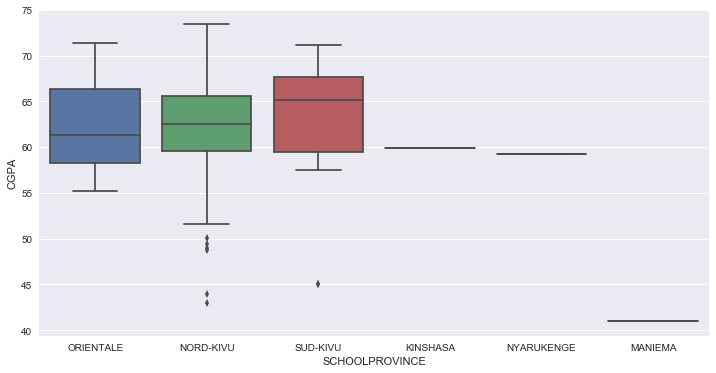

In [704]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Teologie,order=TeolGroup.SCHOOLPROVINCE)
plt.savefig('GENDER-SCHOOLPROVINCE-TeO.png',dpi=100)

#### B.5 Stattus de L'école 

In [706]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Teologie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),5.0,113.697185,22.739437,0.577138,0.717429
Residual,134.0,5279.644506,39.400332,NaN,NaN


les moyennes sont le meme

In [707]:
Teologie.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
publique,7832.884615,53.884615,33.038462,63.456731,1.961538
privé,9352.571429,55.714286,34.142857,63.289286,2.285714
catholique,10692.000000,51.333333,23.666667,63.133334,2.000000
protestant,8548.438596,54.245614,29.245614,61.890790,2.070175
inconnu,7520.434783,53.195652,33.021739,61.082246,2.173913
autodidacte,3135.000000,50.000000,45.000000,60.099998,1.000000


contrirement aux idéées reussi ceux provennat des écoles publiques , privées et protestant sont les mieux representé

Voyons cela de plus pret avec box-plot

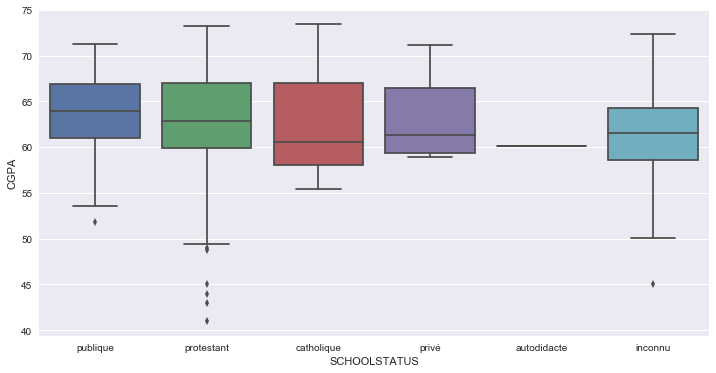

In [708]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Teologie)
plt.savefig('-SCHOOLSTATUS-ECO.png',dpi=100)

que ceux qui echouent sont ceux provenant des écoles publiques et protestants

#### B.Les Ecoles de provenances

In [709]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Teologie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),89.0,3765.774777,42.312076,1.299857,0.156736
Residual,50.0,1627.566915,32.551338,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [710]:
SchoolGroup=Teologie.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [711]:
SchoolGroup.reset_index(inplace=True)

In [712]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,anuarite,11784.0,52.000000,19.0,73.400002,1.000000
1,vuhika,5758.0,52.000000,27.0,72.399998,2.000000
2,ndahura,5178.0,50.000000,43.0,71.533333,3.000000
3,boyulu,8490.0,51.000000,46.0,71.399998,2.000000
4,mikeno nc,4149.0,62.000000,39.0,71.300003,1.000000
5,uhuru,8676.0,58.000000,24.0,70.775002,4.000000
6,metanoia,4642.0,58.000000,29.0,69.450001,2.000000
7,vikanzu,5746.0,57.000000,39.0,69.266668,3.000000
8,mgr guido,5747.0,51.000000,39.0,68.733332,3.000000
9,Institut de KATWA,11528.0,55.000000,26.0,67.900002,1.000000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

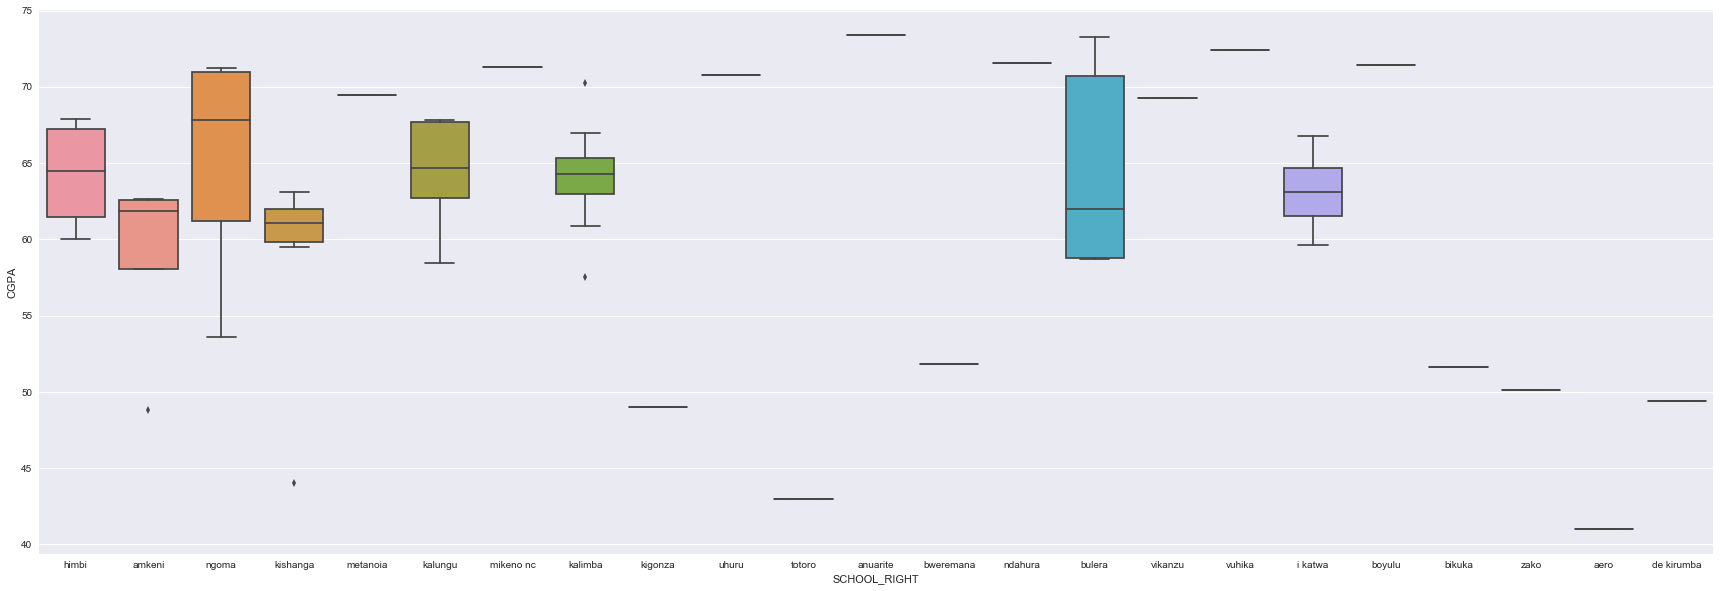

In [714]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA",  data=Teologie.loc[operator.or_(Teologie.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,8) +range(83,90)].SCHOOL_RIGHT) 
             ,Teologie.SCHOOL_RIGHT.isin(Teologie.SCHOOL_RIGHT.value_counts()[:8].index ))])
plt.savefig('SCHOOL_RIGHT-CGPATeo.png',dpi=100)

certain ecoles éechoulent lementablement d'autres reussisent'

#### B.7 OPTION DU DIPLOME 

In [715]:
len(Teologie.OPTION_RIGHT.value_counts())

11

Nous pouvons constater que nous avons 11 options differents Voyons comment evoluer la moyenne

In [716]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Teologie).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),10.0,428.945960,42.894596,1.114618,0.356164
Residual,129.0,4964.395731,38.483688,NaN,NaN


il existe un lient entrre les moyenne de l'option de porvenance 

In [717]:
GroupOption=Teologie.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

In [718]:
GroupOption

,OPTION_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,math-physique,6066.000000,50.750000,34.500000,66.164583,3.250000
1,bio-chimie,6189.833333,52.666667,37.666667,65.586112,2.166667
2,latin philo,9706.714286,55.142857,25.857143,64.836905,2.285714
3,commmerciale et adm,8399.000000,56.300000,29.300000,64.560834,1.800000
4,construction,10361.500000,50.500000,26.500000,63.633335,2.000000
5,vétérinaire,11568.000000,61.000000,26.000000,63.299999,1.000000
6,sociale,8135.000000,53.461538,30.230769,62.775001,1.615385
7,pedagogie,8051.677778,53.744444,32.022222,61.126944,2.133333
8,hotesse d'acceuil,9062.333333,50.666667,27.000000,60.533333,2.000000
9,nutr,8461.666667,52.666667,28.000000,59.150001,2.000000


On peut aisement remarquer que le CGPA es plus elevé selon les sections

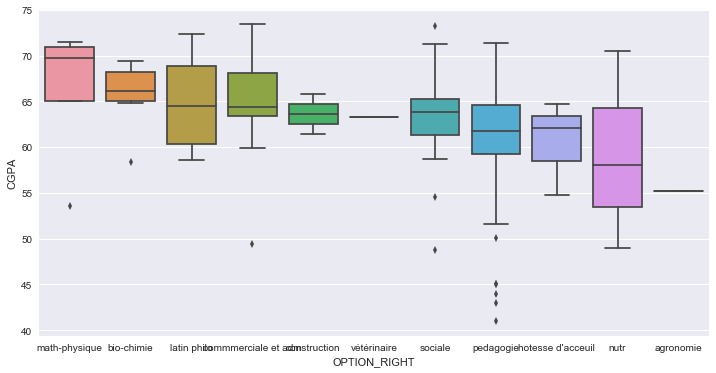

In [720]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Teologie,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPATeolo.png',dpi=100)

On conclu que l'echecs n'est ne sont que des cas rare en teologie

##### Faculté de Droit

In [597]:
Droit=datasetFin.loc[datasetFin.FAC=='FD']

On constate que le pourcentage de CGPA varie differament pour chaque option du diplome , les options peda, sociale ,vienne en dernier en ce qui concerne le cGPA mean 

In [598]:
Droit.shape

(896, 14)

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

A.0 Distribution du CGPA

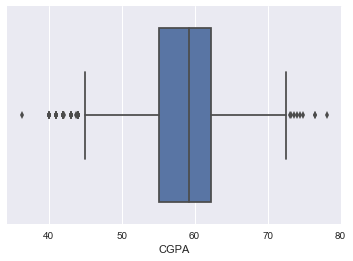

In [599]:
plt.figure()
ax = sns.boxplot(x=Droit['CGPA'])
plt.savefig('CGPA-ECO-Droit.png',dpi=100)

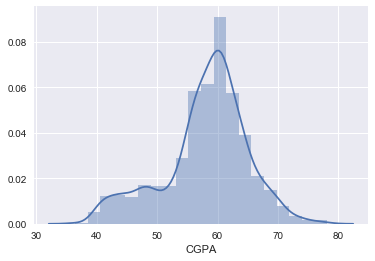

In [600]:
plt.figure()
sns.distplot(Droit['CGPA'],bins=20,axlabel='CGPA',kde=1,norm_hist=0)
plt.savefig('CGPADistDroit.png',dpi=100)

Il suit une distribution presque normale d'écart type : 7

In [601]:
np.std(Droit.CGPA)

7.0136400827197347

In [602]:
np.mean(Droit.CGPA)

58.022023761201453

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

In [603]:
Droit.corr()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
ID,1.000000,0.041124,-0.610896,-0.303752,-0.212584
DIPPERC,0.041124,1.000000,-0.157011,0.220699,0.155471
AGE,-0.610896,-0.157011,1.000000,0.114151,0.043887
CGPA,-0.303752,0.220699,0.114151,1.000000,0.342643
NACADYEAR,-0.212584,0.155471,0.043887,0.342643,1.000000


Nous pouvons aisement qu'il n'yas aucune correlation entre le le CGPA et le pourcentage à l'exetat  ni meme l'age des étudiants

#### C.2 GENDER

In [604]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Droit).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,6.556803,6.556803,0.133015,0.715413
Residual,894.0,44068.711097,49.293860,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

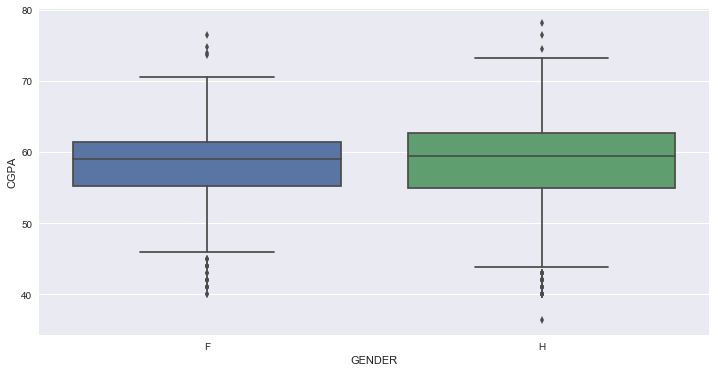

In [605]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Droit)
plt.savefig('GENDER-CGPA-Droit.png',dpi=100)

In [606]:
Droit.GENDER.value_counts()/len(Droit)

H    0.602679
F    0.397321
Name: GENDER, dtype: float64

Nous remarquons que les 2 graphiques sont les memes , equilibre car la facultée est constitué par 60% des hommes et 40% des femmes 

In [608]:
Droit.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,9039.446629,56.353239,23.766854,57.916667,1.966292
H,8704.253704,56.018290,25.433333,58.091481,1.944444


Mais on peut remarquer que les moyenees restent la meme 

#### B.4 Attribue Province

In [609]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Droit).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),10.0,673.67125,67.367125,1.37368,0.187473
Residual,885.0,43401.59665,49.041352,NaN,NaN


PR =0.18 est superieur à 0.05 nous pouvons conclure que la moyenne est la meme au seind de certaines provinces

In [610]:
DroitGroup=Droit.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

In [611]:
DroitGroup.reset_index(inplace=True
                     )

In [612]:
DroitGroup

,SCHOOLPROVINCE,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,EQUATEUR,4659.000000,59.000000,27.000000,63.849998,2.000000
1,inconnu,6546.600000,53.775304,26.800000,63.820001,1.800000
2,BAS CONGO,9194.000000,67.000000,21.000000,60.633334,3.000000
3,NORD-KIVU,8891.984709,56.271794,24.313456,58.141055,1.963303
4,SUD-KIVU,8735.592179,55.955307,25.916201,58.058147,1.955307
5,KINSHASA,8367.750000,56.416667,24.333333,57.284722,1.833333
6,ORIENTALE,8562.875000,55.812500,25.937500,57.107812,1.875000
7,MANIEMA,9738.562500,54.250000,26.187500,55.998958,1.875000
8,KASAI ORIENTAL,7375.000000,52.000000,28.000000,52.950000,2.000000
9,KATANGA,7724.375000,54.375000,30.000000,52.883333,1.625000


Pour conclure cocernant la moyenne on tien compte du nombre des individu d'ou un boxplot est importtant

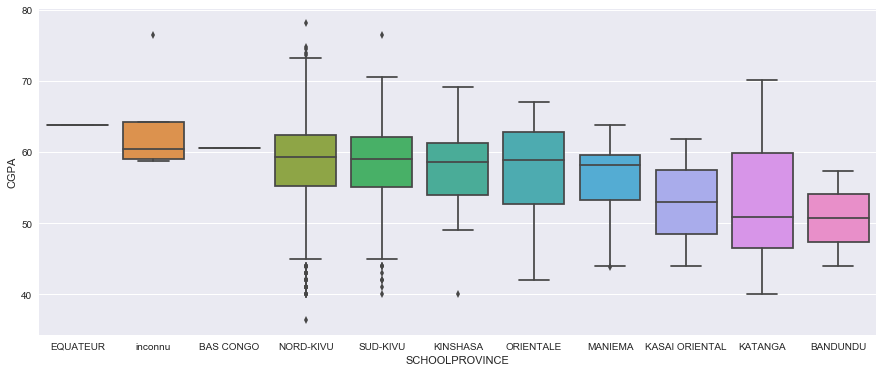

In [613]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Droit,order=DroitGroup.SCHOOLPROVINCE)
plt.savefig('GENDER-SCHOOLPROVINCE-Droit.png',dpi=100)

Nous remarquons que le moyenne du CGPA est la meme pour les provinces suivantes : Nord-Kivu, Sud-Kivu, Kinshase , Orientale ,Maniema, les distinctions proviennent beaucoup plus des provincces du nord-kivu, sud kivu et kinshasa.

#### B.5 Stattus de L'école 

In [614]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Droit).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),7.0,2425.484297,346.497757,7.387554,1.203365e-08
Residual,888.0,41649.783603,46.902909,NaN,NaN


Il n'ya aucun lien entre les moyennes de CGPA pour les differents status de l"ecole

In [615]:
Droit.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8957.460674,57.505618,24.365169,59.695786,1.932584
protestant,8703.625954,55.991895,24.282443,59.365522,2.087786
kimbanguiste,9094.000000,58.000000,27.500000,57.699999,1.000000
inconnu,7941.496815,56.278682,26.477707,57.519055,2.121019
publique,9119.818182,55.895105,25.041958,57.066900,1.881119
musulman,9339.000000,50.900000,23.600000,56.260000,1.800000
privé,9649.330769,54.976923,23.730769,55.325833,1.653846
autodidacte,9044.428571,57.500000,27.285714,53.335714,1.571429


Les écoles catholiques et protestant son coude à coude pour la moyenne du pourcentage 

Voyons cela de plus pret avec box-plot

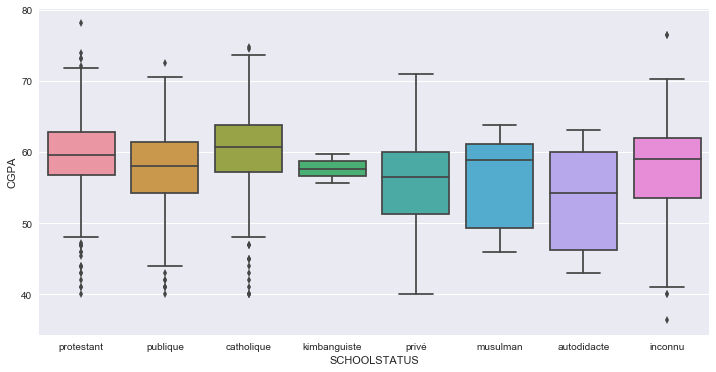

In [616]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Droit)
plt.savefig('SCHOOLSTATUS-ECO-Droit.png',dpi=100)

Nous remarquons que les celles étudiants qui distingunt c'est ceux provennant des écoles protestants et catholiques, en queu de la liste se trouve les autodidacte

#### B.Les Ecoles de provenances

In [617]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Droit).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),278.0,20021.578509,72.020067,1.847383,2.591052e-10
Residual,617.0,24053.689392,38.984910,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [618]:
SchoolGroup=Droit.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [619]:
SchoolGroup.reset_index(inplace=True)

In [620]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,muhe,8630.000000,56.000000,26.000000,76.450001,2.000000
1,L MWANDU,4716.000000,51.000000,28.000000,70.250000,2.000000
2,MWANGAZA,6592.000000,59.000000,26.000000,70.150002,2.000000
3,LYCEE MWANDU,3776.000000,55.000000,27.000000,70.099998,1.000000
4,edap isp bkv,8700.000000,50.000000,23.000000,69.700001,4.000000
5,belge,4997.500000,53.438261,29.500000,69.650000,1.000000
6,vuhika,5720.000000,59.000000,24.000000,69.000003,3.000000
7,ziwa kivu,8905.000000,61.000000,27.000000,68.500000,2.000000
8,nyantende,8949.000000,58.000000,23.000000,68.500000,3.000000
9,imani panzi,3954.000000,53.000000,30.000000,68.300003,1.000000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

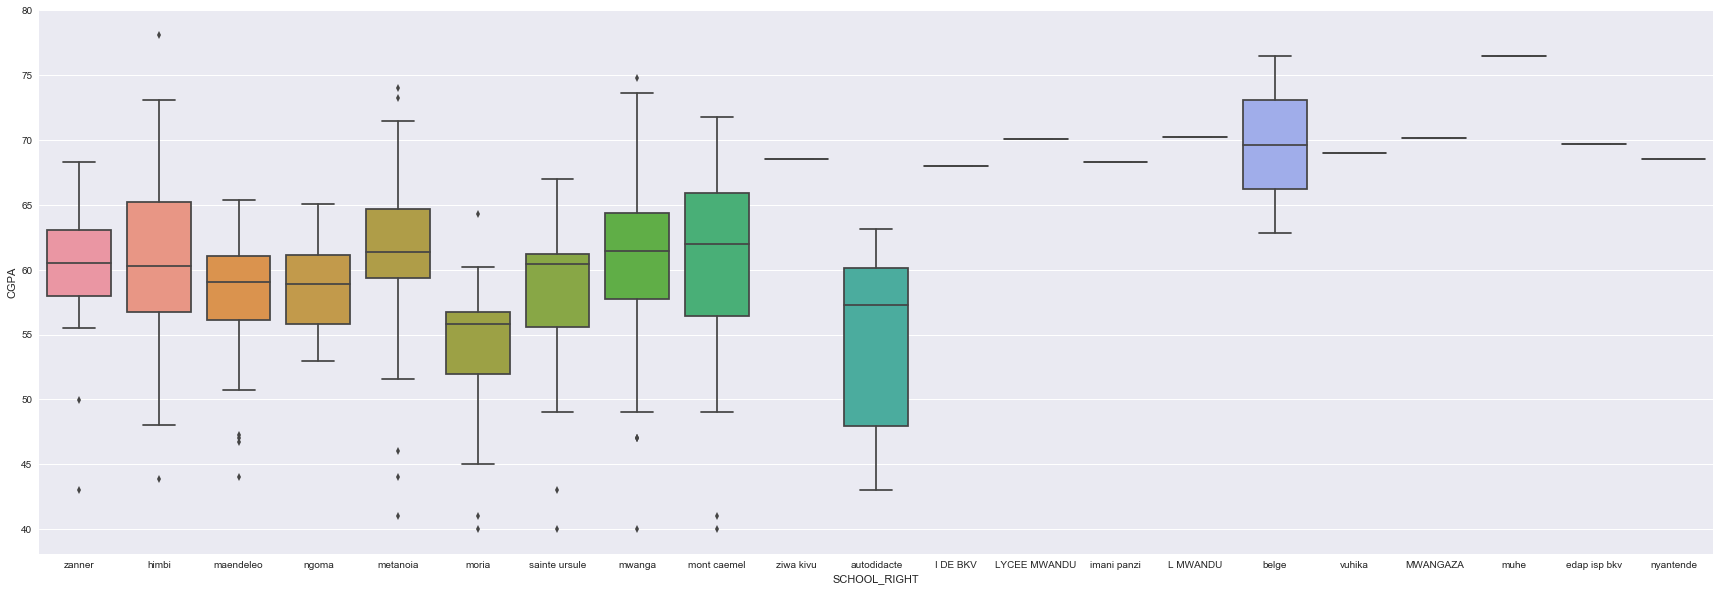

In [621]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA",  data=Droit.loc[operator.or_(Droit.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Droit.SCHOOL_RIGHT.isin(Droit.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPADroit.png',dpi=100)

#### B.7 OPTION DU DIPLOME 

In [622]:
len(Droit.OPTION_RIGHT.value_counts())

17

Nous pouvons constater que nous avons 17 options differents Voyons comment evoluer la moyenne

In [623]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Droit).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),16.0,3643.285363,227.705335,4.950363,7.251535e-10
Residual,879.0,40431.982537,45.997705,NaN,NaN


La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs , certaines écoles on une bonne moyenne du GPA que d'autres donc elle depend de l'ecole de provenance

In [624]:
GroupOption=Droit.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

In [625]:
GroupOption

,OPTION_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,agrecole,8905.000000,61.000000,27.000000,68.500000,2.000000
1,electronique générale,8782.000000,52.000000,28.000000,64.024999,4.000000
2,inconnu,5019.500000,59.188261,30.750000,62.237500,2.250000
3,hotesse d'acceuil,11449.000000,52.000000,21.000000,60.599998,1.000000
4,latin philo,8642.457565,57.221402,24.254613,60.580350,2.103321
5,coupe couture,8169.000000,54.000000,25.000000,59.588889,2.333333
6,commmerciale et adm,8452.080645,54.288331,24.467742,59.008871,1.854839
7,economie,10066.000000,55.000000,24.000000,58.700001,2.000000
8,elec indust,10773.000000,56.000000,30.000000,58.600000,2.000000
9,bio-chimie,8302.535714,55.321429,24.428571,58.247321,2.107143


Voila comme on pourait s'y attendre l'option latin philo est en tete de kiste les options commerciale , pedagogie , sociale , math-physique ,mec sont en bas de l'echele

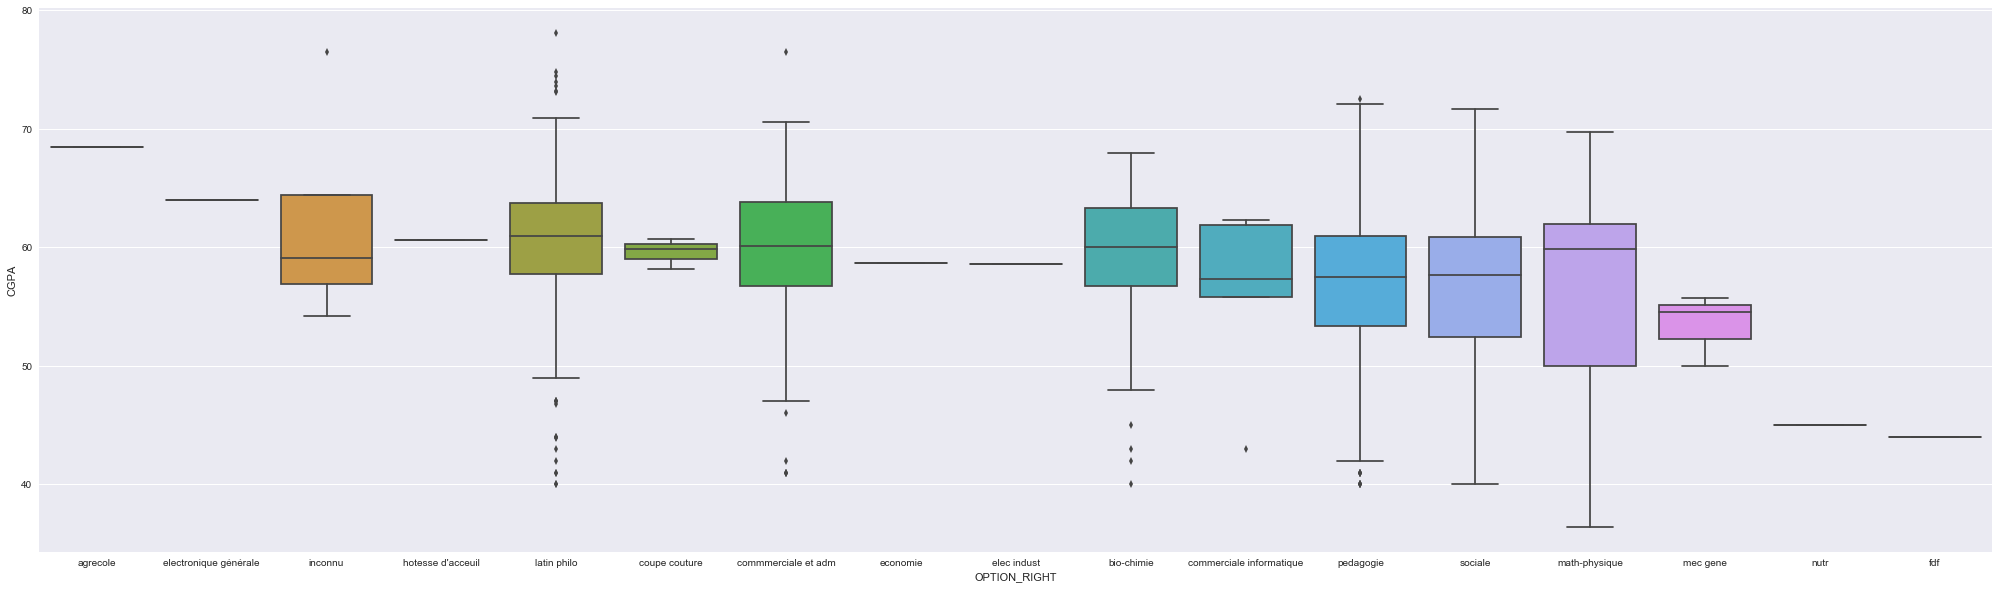

In [626]:
plt.figure(figsize=(35,10))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Droit,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPADroit.png',dpi=100)

Nous voici a la fin de notre anayse bi-varie 2 eme iterartion ! 

In [722]:
datasetFin.to_csv('DatasetFinalV1.csv')
Techno.to_csv("DatasetTechno.csv")
Medecine.to_csv('DatasetMedecine.csv')
Economie.to_csv('DatasetEconomie.csv')
Droit.to_csv('DatasetDroit.csv')
Sante.to_csv('DatsetSante.csv')
Psyco.to_csv('DatasetPsycho.csv')
Teologie.to_csv('DatasetTeo.csv')

Avant de conclure cette phase nous allons essayer de voir comment se comporte nos 3 autres variables de sorties face au CGPA

In [4]:
datasetFin=pd.read_csv('dataset/DatasetFinalV1.csv',index_col="Unnamed: 0")

In [5]:
datasetFin.head(3)

,ID,SCHOOLSTATUS,SCHOOL_RIGHT,OPTION_RIGHT,FAC,SCHOOLPROVINCE,GENDER,DIPPERC,AGE,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,3895,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,H,52.0,31,59.400002,G,G,1.0,G
1,4048,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,H,53.0,30,40.000000,G,A,1.0,G
2,4217,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,H,54.0,28,61.299999,G,G,1.0,A


Analysons les correlations existants entre le ratio des distinction et le CGPA

#### CGPA-PassageEnPremierre Sesion

In [17]:
datasetFin.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [18]:
moore_lm = ols('CGPA ~ C(Pass1stSessionRatio)',data=datasetFin).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Pass1stSessionRatio),6.0,72133.769233,12022.294872,322.197877,0.0
Residual,4708.0,175671.437790,37.313390,NaN,NaN


In [19]:
datasetFin.Pass1stSessionRatio.value_counts()

G    3224
A     646
D     338
E     268
C     157
F      42
B      40
Name: Pass1stSessionRatio, dtype: int64

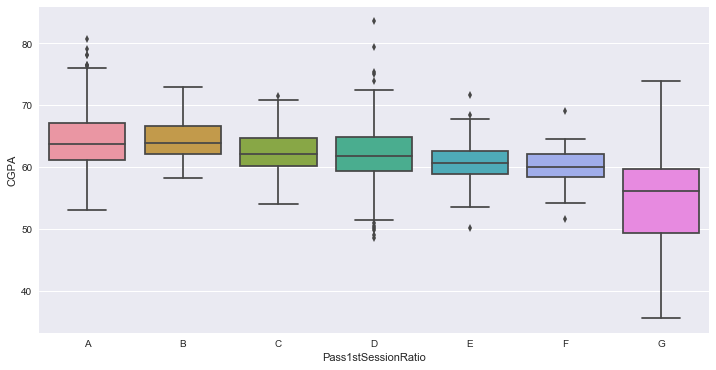

In [21]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="Pass1stSessionRatio", y="CGPA", data=datasetFin,order=['A','B','C','D','E','F','G'])
plt.savefig('pic/CGPA-Disti.png',dpi=100)

Regradons commen se repartissent les moyenne au sein de chaque categorie

In [22]:
Pass1stSessionRatiogroup=datasetFin.groupby('Pass1stSessionRatio').mean().sort_values(axis=0,by='CGPA',ascending=False).reset_index()

In [23]:
Pass1stSessionRatiogroup

,Pass1stSessionRatio,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,B,8027.100000,60.925000,25.375000,64.480625,4.000000
1,A,8324.917957,59.308833,25.113003,64.399471,1.682663
2,C,8191.713376,59.101124,24.726115,62.569002,3.000000
3,D,8599.124260,58.430491,24.428994,62.198299,2.331361
4,E,8084.843284,57.944625,24.895522,60.812065,3.000000
5,F,7713.833333,59.639917,24.928571,60.181548,4.000000
6,G,8913.153226,55.946388,24.664702,54.724152,1.720223


Avec un valeur de Pr de 0 <0.05 on conclu que la moyene ne peut jamais etre la meme groupes de cette valeur de  satisfaction e premierre session par consequent nous pouvons grouper les classes entre elles  mais juste apres verification du box plot

#### CGPA-EchecRatio

In [17]:
datasetFin.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [36]:
moore_lm = ols('CGPA ~ C(EchecRatio)',data=datasetFin).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(EchecRatio),5.0,173017.739123,34603.547825,2178.815666,0.0
Residual,4709.0,74787.467899,15.881815,NaN,NaN


In [37]:
datasetFin.EchecRatio.value_counts()

G    3289
A     916
D     255
E     185
C      56
F      14
Name: EchecRatio, dtype: int64

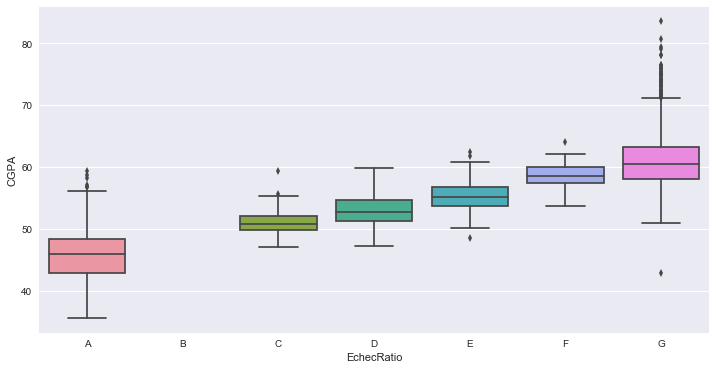

In [38]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="EchecRatio", y="CGPA", data=datasetFin,order=['A','B','C','D','E','F','G'])
plt.savefig('pic/CGPA-Echec.png',dpi=100)

Regradons commen se repartissent les moyenne au sein de chaque categorie

In [40]:
EchecRatiogroup=datasetFin.groupby('EchecRatio').mean().sort_values(axis=0,by='CGPA',ascending=False).reset_index()

In [41]:
EchecRatiogroup

,EchecRatio,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,G,8605.802067,57.390488,24.761630,61.051781,2.041654
1,F,7559.571429,60.428571,24.428571,58.769643,4.000000
2,E,7768.600000,56.313514,25.637838,55.420541,3.000000
3,D,8742.254902,55.943645,24.533333,52.944118,2.039216
4,C,7754.517857,56.973323,26.214286,51.186905,3.000000
5,A,9396.586245,55.356582,24.415939,45.896798,1.102620


Avec une PR de 0 on conclu fortement que la moyenne ne peut pas etre la meme au sein de chaque groupe !

### CGPA-Distinction Ratio

In [8]:
moore_lm = ols('CGPA ~ C(DistinctionRatio)',data=datasetFin).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

/Users/espyMur/Desktop/Memory-WorkingDir/memoryVenv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/espyMur/Desktop/Memory-WorkingDir/memoryVenv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/espyMur/Desktop/Memory-WorkingDir/memoryVenv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(DistinctionRatio),6.0,41087.520237,6847.920039,155.961534,3.525333e-181
Residual,4708.0,206717.686786,43.907750,NaN,NaN


In [9]:
datasetFin.DistinctionRatio.value_counts()

G    4467
A      81
D      76
E      43
C      22
F      21
B       5
Name: DistinctionRatio, dtype: int64

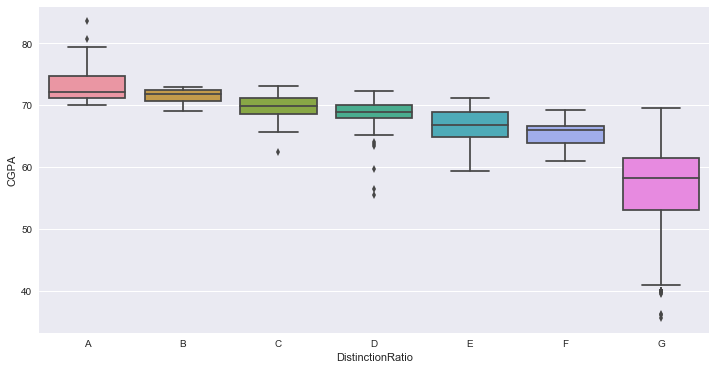

In [13]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="DistinctionRatio", y="CGPA", data=datasetFin,order=['A','B','C','D','E','F','G'])
plt.savefig('pic/CGPA-Disti.png',dpi=100)

Regradons commen se repartissent les moyenne au sein de chaque categorie

In [15]:
DistinctionOption=datasetFin.groupby('DistinctionRatio').mean().sort_values(axis=0,by='CGPA',ascending=False).reset_index()

In [16]:
DistinctionOption

,DistinctionRatio,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,A,7843.283951,63.910531,25.925926,73.066769,1.851852
1,B,8214.400000,61.400000,26.200000,71.425000,4.000000
2,C,7979.500000,61.636364,26.818182,69.574242,3.000000
3,D,7520.631579,59.513158,26.000000,68.486513,2.315789
4,E,7810.860465,59.627907,24.232558,66.616279,3.000000
5,F,7902.523810,60.803644,24.190476,65.686905,4.000000
6,G,8773.896127,56.633188,24.685024,56.643944,1.880233


Nous concluons que ceux qui on distinguer à 100% on une moyenne de 73 et on ne peut pas dire qu'il ya une correlation notable entre ces attribues

Enfin voyons comment evolue cette caracteristique au sein de chaque faculté

#### CGPA-FAC

In [17]:
datasetFin.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [42]:
moore_lm = ols('CGPA ~ C(FAC)',data=datasetFin).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(FAC),6.0,11054.669798,1842.444966,36.638696,1.244254e-43
Residual,4708.0,236750.537224,50.286860,NaN,NaN


In [43]:
datasetFin.FAC.value_counts()*100/len(datasetFin)

FSEG    32.852598
FSTA    19.151644
FD      19.003181
FSDC    16.076352
FM       5.132556
FPSE     4.814422
FT       2.969247
Name: FAC, dtype: float64

Avec ces metriques nous pouvons voir la repartition de nos echantillons au sein de chaque faculté

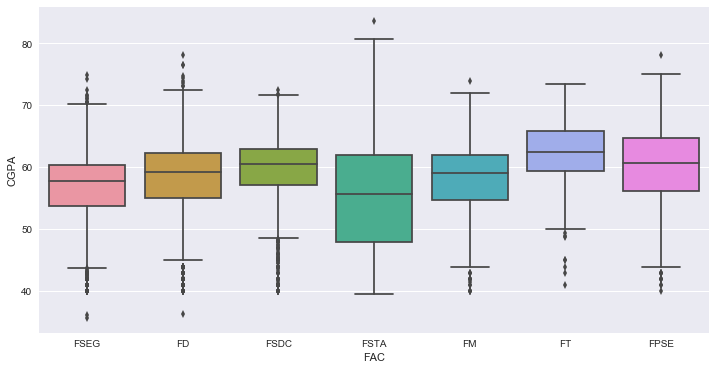

In [44]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="FAC", y="CGPA", data=datasetFin)
plt.savefig('pic/CGPA-FAC.png',dpi=100)

Regradons commen se repartissent les moyenne au sein de chaque categorie

In [45]:
FACgroup=datasetFin.groupby('FAC').mean().sort_values(axis=0,by='CGPA',ascending=False).reset_index()

In [47]:
FACgroup

,FAC,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,FT,8125.250000,53.814286,31.428571,61.999703,2.085714
1,FPSE,8417.453744,56.202099,28.224670,59.558921,2.013216
2,FSDC,8195.007916,55.329211,25.974934,58.917700,1.974934
3,FD,8837.433036,56.151372,24.771205,58.022024,1.953125
4,FM,10887.719008,59.434420,21.487603,57.675207,1.471074
5,FSEG,8410.416398,56.832564,24.323434,56.446100,1.916720
6,FSTA,9166.437431,58.941594,23.307863,55.419684,1.885936


La moyenne de GPA n'est pas la meme au sein de chaque faculté  nous pouvons remqrque comment il se repatie sur la figure